# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _for Pythonistas_

> TL;DR: _Julia looks and feels a lot like Python, only much faster. It's dynamic, expressive, extensible, with batteries included, in particular for Data Science_.

This notebook is an **introduction to Julia for Python programmers**.

It will go through the most important Python features (such as functions, basic types, list comprehensions, exceptions, generators, modules, packages, and so on) and show you how to code them in Julia.

# Getting Started with Julia in Colab/Jupyter
You can either run this notebook in Google Colab, or using Jupyter on your own machine.

## Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyCall PyPlot"
JULIA_PACKAGES_IF_GPU="CUDA"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2020-07-01 23:05:07 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed MbedTLS_jll ───── v2.16.6+0
  Installed VersionParsing ── v1.2.0
  Installed SoftGlobalScope ─ v1.0.10
  Installed Parsers ───────── v1.0.6
  Installed Conda ─────────── v1.4.1
  Installed JSON ──────────── v0.21.0
  Installed IJulia ────────── v1.21.2
  Installed ZeroMQ_jll ────── v4.3.2+4
  Installed ZMQ ───────────── v1.2.1
  Installed MbedTLS ───────── v1.0.2
######################################################################## 100.0%
#######################################################################

## Running This Notebook Locally
If you prefer to run this notebook on your machine instead of Google Colab:

* Download this notebook (File > Download .ipynb)
* Install [Julia](https://julialang.org/downloads/)
* Run the following command in a terminal to install `IJulia` (the Jupyter kernel for Julia), and a few packages we will use:
```bash
julia -e 'using Pkg
            pkg"add IJulia; precompile;"
            pkg"add BenchmarkTools; precompile;"
            pkg"add PyCall; precompile;"
            pkg"add PyPlot; precompile;"'
```

* Next, go to the directory containing this notebook:

    ```julia
cd /path/to/notebook/directory
```

* Start Jupyter Notebook:

    ```bash
julia -e 'using IJulia; IJulia.notebook()'
```

    Or replace `notebook()` with `jupyterlab()` if you prefer JupyterLab.

    If you do not already have [Jupyter](https://jupyter.org/install) installed, IJulia will propose to install it. If you agree, it will automatically install a private Miniconda (just for Julia), and install Jupyter and Python inside it.

* Lastly, open this notebook and skip directly to the next section.

## Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system (if you ever ask for help or file an issue about Julia, you should always provide this information).

In [1]:
versioninfo()

Julia Version 1.4.2
Commit 44fa15b150* (2020-05-23 18:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, skylake)
Environment:
  JULIA_NUM_THREADS = 4


# Getting Help
To get help on any module, function, variable, or just about anything else, just type `?` followed by what you're interested in. For example:

In [2]:
?versioninfo

search: versioninfo



```
versioninfo(io::IO=stdout; verbose::Bool=false)
```

Print information about the version of Julia in use. The output is controlled with boolean keyword arguments:

  * `verbose`: print all additional information


This works in interactive mode only: in Jupyter, Colab and in the Julia shell (called the REPL).

Here are a few more ways to get help and inspect objects in interactive mode:

|Julia|Python
|-----|------
|`?obj` | `help(obj)`
|`dump(obj)` | `print(repr(obj))`
|`names(FooModule)` | `dir(foo_module)`
|`methodswith(SomeType)` | `dir(SomeType)`
|`@which func` | `func.__module__`
|`apropos("bar")` | Search for `"bar"` in docstrings of all installed packages
|`typeof(obj)` | `type(obj)`
|`obj isa SomeType`<br />or<br />`isa(obj, SomeType)` | `isinstance(obj, SomeType)`

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

And of course, you can also learn and get help here:

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

# A First Look at Julia
This section will give you an idea of what Julia looks like and what some of its major qualities are: it's expressive, dynamic, flexible, and most of all, super fast.

## Estimating π
Let's write our first function. It will estimate π using the equation:
$π = 4 \times \left(1 - \dfrac{1}{3} + \dfrac{1}{5} - \dfrac{1}{7} + \dfrac{1}{9}-\dfrac{1}{11}+\dots\right)$

There are much better ways to estimate π, but this one is easy to implement.

In [3]:
function estimate_pi(n)
    s = 1.0
    for i in 1:n
        s += (isodd(i) ? -1 : 1) / (2i + 1)
    end
    4s
end

p = estimate_pi(100_000_000)
println("π ≈ $p")
println("Error is $(p - π)")

π ≈ 3.141592663589326
Error is 9.999532757376528e-9


**Note**: syntax highlighting for Julia does not work (yet?) on Colab, but it does in Jupyter.

Compare this with the equivalent Python 3 code:

```python
# PYTHON
import math

def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s

p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
```

Pretty similar, right? But notice the small differences:

|Julia|Python
|-----|------
|`function` | `def`
|`for i in X`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `for i in X:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`1:n` | `range(1, n+1)`
|`cond ? a : b` | `a if cond else b`
|`2i + 1` | `2 * i + 1`
|`4s` | `return 4 * s`
|`println(a, b)` | `print(a, b, sep="")`
|`print(a, b)` | `print(a, b, sep="", end="")`
|`"$p"` | `f"{p}"`
|`"$(p - π)"` | `f"{p - math.pi}"`

This example shows that:
* Julia can be just as concise and readable as Python.
* Indentation in Julia is _not_ meaningful like it is in Python. Instead, blocks end with `end`.
* Many math features are built in Julia and need no imports.
* There's some mathy syntactic sugar, such as `2i` (but you can write `2 * i` if you prefer).
* In Julia, the `return` keyword is optional at the end of a function. The result of the last expression is returned (`4s` in this example).
* Julia loves Unicode and does not hesitate to use Unicode characters like `π`. However, there are generally plain-ASCII equivalents (e.g., `π == pi`).

## Typing Unicode Characters

Typing Unicode characters is easy: for latex symbols like π, just type `\pi<tab>`. For emojis like 😃, type `\:smiley:<tab>`.

This works in the REPL, in Jupyter, but unfortunately not in Colab (yet?). As a workaround, you can run the following code to print the character you want, then copy/paste it:

In [4]:
using REPL.REPLCompletions: latex_symbols, emoji_symbols

latex_symbols["\\pi"]

"π"

In [5]:
emoji_symbols["\\:smiley:"]

"😃"

In Julia, `using Foo.Bar: a, b` corresponds to running `from foo.bar import a, b` in Python.

|Julia|Python
|-----|------
|`using Foo` | `from foo import *; import foo`
|`using Foo.Bar` | `from foo.bar import *; from foo import bar`
|`using Foo.Bar: a, b` | `from foo.bar import a, b`
|`using Foo: Bar` | `from foo import bar`

More on this later.

## Running Python code in Julia
Julia lets you easily run Python code using the `PyCall` module. We installed it earlier, so we just need to import it:

In [6]:
using PyCall

Now that we have imported `PyCall`, we can use the `pyimport()` function to import a Python module directly in Julia! For example, let's check which Python version we are using:

In [7]:
sys = pyimport("sys")
sys.version

"3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]"

In fact, let's run the Python code we discussed earlier (this will take about 15 seconds to run, because Python is so slow...):

In [8]:
py"""
import math
 
def estimate_pi(n):
    s = 1.0
    for i in range(1, n + 1):
        s += (-1 if i % 2 else 1) / (2 * i + 1)
    return 4 * s
 
p = estimate_pi(100_000_000)
print(f"π ≈ {p}") # f-strings are available in Python 3.6+
print(f"Error is {p - math.pi}")
"""


As you can see, running arbitrary Python code is as simple as using py-strings (`py"..."`). Note that py-strings are not part of the Julia language itself: they are defined by the `PyCall` module (we will see how this works later).

Unfortunately, Python's `print()` function writes to the standard output, which is not captured by Colab, so we can't see the output of this code. That's okay, we can look at the value of `p`:

In [9]:
py"p"

3.141592663589326

Let's compare this to the value we calculated above using Julia:

In [10]:
py"p" - p

0.0

Perfect, they are exactly equal!

As you can see, it's very easy to mix Julia and Python code. So if there's a module you really love in Python, you can keep using it as long as you want! For example, let's use NumPy:

In [11]:
np = pyimport("numpy")
a = np.random.rand(2, 3)

2×3 Array{Float64,2}:
 0.940033  0.972615  0.665339
 0.458672  0.365321  0.802684

Notice that `PyCall` automatically converts some Python types to Julia types, including NumPy arrays. That's really quite convenient! Note that Julia supports multi-dimensional arrays (analog to NumPy arrays) out of the box. `Array{Float64, 2}` means that it's a 2-dimensional array of 64-bit floats.

`PyCall` also converts Julia arrays to NumPy arrays when needed:

In [12]:
exp_a = np.exp(a)

2×3 Array{Float64,2}:
 2.56007  2.64485  1.94515
 1.58197  1.44098  2.23152

If you want to use some Julia variable in a py-string, for example `exp_a`, you can do so by writing `$exp_a` like this:

In [13]:
py"""
import numpy as np

result = np.log($exp_a)
"""

py"result"

2×3 Array{Float64,2}:
 0.940033  0.972615  0.665339
 0.458672  0.365321  0.802684

If you want to keep using Matplotlib, it's best to use the `PyPlot` module (which we installed earlier), rather than trying to use `pyimport("matplotlib")`, as `PyPlot` provides a more straightforward interface with Julia, and it plays nicely with Jupyter and Colab:

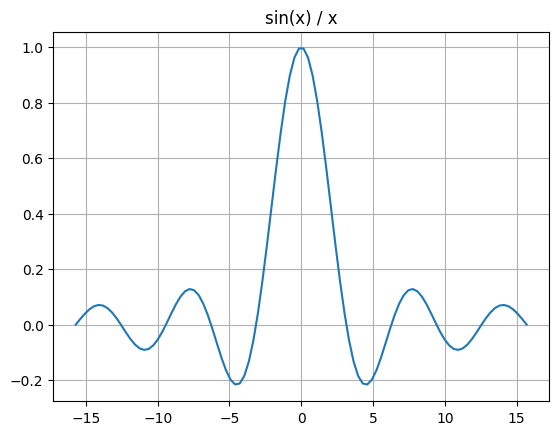

In [14]:
using PyPlot

x = range(-5π, 5π, length=100)
plt.plot(x, sin.(x) ./ x) # we'll discuss this syntax in the next section
plt.title("sin(x) / x")
plt.grid("True")
plt.show()

That said, Julia has its own plotting libraries, such as the `Plots` library, which you may want to check out.

As you can see, Julia's `range()` function acts much like NumPy's `linspace()` function, when you use the `length` argument. However, it acts like Python's `range()` function when you use the `step` argument instead (except the upper bound is inclusive). Julia's `range()` function returns an object which behaves just like an array, except it doesn't actually use any RAM for its elements, it just stores the range parameters. If you want to collect all of the elements into an array, use the `collect()` function (similar to Python's `list()` function):

In [15]:
println(collect(range(10, 80, step=20)))
println(collect(10:20:80)) # 10:20:80 is equivalent to the previous range
println(collect(range(10, 80, length=5))) # similar to NumPy's linspace()
step = (80-10)/(5-1) # 17.5
println(collect(10:step:80)) # equivalent to the previous range

[10, 30, 50, 70]
[10, 30, 50, 70]
[10.0, 27.5, 45.0, 62.5, 80.0]
[10.0, 27.5, 45.0, 62.5, 80.0]


The equivalent Python code is:

```python
# PYTHON
print(list(range(10, 80+1, 20)))
# there's no short-hand for range() in Python
print(np.linspace(10, 80, 5))
step = (80-10)/(5-1) # 17.5
print([i*step + 10 for i in range(5)])
```

|Julia|Python
|-----|------
|`np = pyimport("numpy")` | `import numpy as np`
|`using PyPlot` | `from pylab import *`
|`1:10` | `range(1, 11)`
|`1:2:10`<br />or<br />`range(1, 11, 2)` | `range(1, 11, 2)`
|`1.2:0.5:10.3`<br />or<br />`range(1.2, 10.3, step=0.5)` | `np.arange(1.2, 10.3, 0.5)`
|`range(1, 10, length=3)` | `np.linspace(1, 10, 3)`
|`collect(1:5)`<br />or<br />`[i for i in 1:5]` | `list(range(1, 6))`<br />or<br />`[i for i in range(1, 6)]`



## Loop Fusion
Did you notice that we wrote `sin.(x) ./ x` (not `sin(x) / x`)? This is equivalent to `[sin(i) / i for i in x]`.

In [16]:
a = sin.(x) ./ x
b = [sin(i) / i for i in x]
@assert a == b

 This is not just syntactic sugar: it's actually a very powerful Julia feature. Indeed, notice that the array only gets traversed once. Even if we chained more than two dotted operations, the array would still only get traversed once. This is called _loop fusion_.

In contrast, when using NumPy arrays, `sin(x) / x` first computes a temporary array containing `sin(x)` and then it computes the final array. Two loops and two arrays instead of one. NumPy is implemented in C, and has been heavily optimized, but if you chain many operations, it still ends up being slower and using more RAM than Julia.

However, all the extra dots can sometimes make the code a bit harder to read. To avoid that, you can write `@.` before an expression: every operation will be "dotted" automatically, like this:

In [17]:
a = @. sin(x) / x
b = sin.(x) ./ x
@assert a == b

**Note**: Julia's `@assert` statement starts with an `@` sign, just like `@.`, which means that they are macros. In Julia, macros are very powerful metaprogramming tools: a macro is evaluated at parse time, and it can inspect the expression that follows it and then transform it, or even replace it. In practice, you will often _use_ macros, but you will rarely _define_ your own. I'll come back to macros later.

## Julia is fast!
Let's compare the Julia and Python implementations of the `estimate_pi()` function:

In [18]:
@time estimate_pi(100_000_000);

  0.135742 seconds


To get a more precise benchmark, it's preferable to use the `BenchmarkTools` module. Just like Python's `timeit` module, it provides tools to benchmark code by running it multiple times. This provides a better estimate of how long each call takes:

In [19]:
using BenchmarkTools

@benchmark estimate_pi(100_000_000)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     134.234 ms (0.00% GC)
  median time:      137.412 ms (0.00% GC)
  mean time:        139.062 ms (0.00% GC)
  maximum time:     151.099 ms (0.00% GC)
  --------------
  samples:          36
  evals/sample:     1

If this output is too verbose for you, simply use `@btime` instead:

In [20]:
@btime estimate_pi(100_000_000)

  134.668 ms (0 allocations: 0 bytes)


3.141592663589326

Now let's time the Python version. Since the call is so slow, we just run it once (it will take about 15 seconds):

In [21]:
py"""
from timeit import timeit

duration = timeit("estimate_pi(100_000_000)", number=1, globals=globals())
"""

py"duration"

14.796545573999992

It looks like Julia is close to 100 times faster than Python in this case! To be fair, `PyCall` does add some overhead, but even if you run this code in a separate Python shell, you will see that Julia crushes (pure) Python when it comes to speed.

So why is Julia so much faster than Python? Well, **Julia compiles the code on the fly as it runs it**.

Okay, let's summarize what we learned so far: Julia is a dynamic language that looks and feels a lot like Python, you can even execute Python code super easily, and pure Julia code runs much faster than pure Python code, because it is compiled on the fly. I hope this convinces you to read on!

Next, let's continue to see how Python's main constructs can be implemented in Julia.

# Numbers

In [22]:
i = 42 # 64-bit integer
f = 3.14 # 64-bit float
c = 3.4 + 4.5im # 128-bit complex number

bi = BigInt(2)^1000 # arbitrarily long integer
bf = BigFloat(1) / 7 # arbitrary precision

r = 15//6 * 9//20 # rational number

9//8

And the equivalent Python code:

```python
# PYTHON
i = 42
f = 3.14
c = 3.4 + 4.5j

bi = 2**1000 # integers are seemlessly promoted to long integers
from decimal import Decimal
bf = Decimal(1) / 7

from fractions import Fraction
r = Fraction(15, 6) * Fraction(9, 20)
```

Dividing integers gives floats, like in Python:

In [23]:
5 / 2

2.5

For integer division, use `÷` or `div()`:

In [24]:
5 ÷ 2

2

In [25]:
div(5, 2)

2

The `%` operator is the remainder, not the modulo like in Python. These differ only for negative numbers:

In [26]:
57 % 10

7

In [27]:
(-57) % 10

-7

|Julia|Python
|-----|------
|`3.4 + 4.5im` | `3.4 + 4.5j`
|`BigInt(2)^1000` | `2**1000`
|`BigFloat(3.14)` | `from decimal import Decimal`<br />`Decimal(3.14)`
|`9//8` | `from fractions import Fraction`<br />`Fraction(9, 8)`
|`5/2 == 2.5` | `5/2 == 2.5`
|`5÷2 == 2`<br />or<br />`div(5, 2)` | `5//2 == 2`
|`57%10 == 7` | `57%10 == 7`
|`(-57)%10 == -7` | `(-57)%10 == 3`


# Strings
Julia strings use double quotes `"` or triple quotes `"""`, but not single quotes `'`:

In [28]:
s = "ångström" # Julia strings are UTF-8 encoded by default
println(s)

ångström


In [29]:
s = "Julia strings
     can span
     several lines\n\n
     and they support the \"usual\" escapes like
     \x41, \u5bb6, and \U0001f60a!"
println(s)

Julia strings
     can span
     several lines


     and they support the "usual" escapes like
     A, 家, and 😊!


Use `repeat()` instead of `*` to repeat a string, and use `*` instead of `+` for concatenation:

In [30]:
s = repeat("tick, ", 10) * "BOOM!"
println(s)

tick, tick, tick, tick, tick, tick, tick, tick, tick, tick, BOOM!


The equivalent Python code is:

```python
# PYTHON
s = "tick, " * 10 + "BOOM!"
print(s)
```

Use `join(a, s)` instead of `s.join(a)`:

In [31]:
s = join([i for i in 1:4], ", ")
println(s)

1, 2, 3, 4


You can also specify a string for the last join:

In [32]:
s = join([i for i in 1:4], ", ", " and ")

"1, 2, 3 and 4"

`split()` works as you might expect:

In [33]:
split("   one    three     four   ")

3-element Array{SubString{String},1}:
 "one"
 "three"
 "four"

In [34]:
split("one,,three,four!", ",")

4-element Array{SubString{String},1}:
 "one"
 ""
 "three"
 "four!"

In [35]:
occursin("sip", "Mississippi")

true

In [36]:
replace("I like coffee", "coffee" => "tea")

"I like tea"

Triple quotes work a bit like in Python, but they also remove indentation and ignore the first line feed:

In [37]:
s = """
       1. the first line feed is ignored if it immediately follows \"""
       2. triple quotes let you use "quotes" easily
       3. indentation is ignored
           - up to left-most character
           - ignoring the first line (the one with \""")
       4. the final line feed it n̲o̲t̲ ignored
       """
println("<start>")
println(s)
println("<end>")

<start>
1. the first line feed is ignored if it immediately follows """
2. triple quotes let you use "quotes" easily
3. indentation is ignored
    - up to left-most character
    - ignoring the first line (the one with """)
4. the final line feed it n̲o̲t̲ ignored

<end>


## String Interpolation
String interpolation uses `$variable` and `$(expression)`:

In [38]:
total = 1 + 2 + 3
s = "1 + 2 + 3 = $total = $(1 + 2 + 3)"
println(s)

1 + 2 + 3 = 6 = 6


This means you must escape the `$` sign:

In [39]:
s = "The car costs \$10,000"
println(s)

The car costs $10,000


## Raw Strings
Raw strings use `raw"..."` instead of `r"..."`:

In [40]:
s = raw"In a raw string, you only need to escape quotes \", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it's just before quotes like \\\"."
println(s)

In a raw string, you only need to escape quotes ", but not
        $ or \. There is one exception, however: the backslash \
        must be escaped if it's just before quotes like \".


In [41]:
s = raw"""
   Triple quoted raw strings are possible too: $, \, \t, "
     - They handle indentation and the first line feed like regular
       triple quoted strings.
     - You only need to escape triple quotes like \""", and the
       backslash before quotes like \\".
   """
println(s)

Triple quoted raw strings are possible too: $, \, \t, "
  - They handle indentation and the first line feed like regular
    triple quoted strings.
  - You only need to escape triple quotes like """, and the
    backslash before quotes like \".



## Characters
Single quotes are used for individual Unicode characters:

In [42]:
a = 'å' # Unicode code point (single quotes)

'å': Unicode U+00E5 (category Ll: Letter, lowercase)

To be more precise:
* A Julia "character" represents a single Unicode code point (sometimes called a Unicode scalar).
* Multiple code points may be required to produce a single _grapheme_, i.e., something that readers would recognize as a single character. Such a sequence of code points is called a "Grapheme cluster".

For example, the character `é` can be represented either using the single code point `\u00E9`, or the grapheme cluster `e` + `\u0301`:

In [43]:
s = "café"
println(s, " has ", length(s), " code points")

café has 4 code points


In [44]:
s = "cafe\u0301"
println(s, " has ", length(s), " code points")

café has 5 code points


In [45]:
for c in "cafe\u0301"
    display(c)
end

'c': ASCII/Unicode U+0063 (category Ll: Letter, lowercase)

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

'f': ASCII/Unicode U+0066 (category Ll: Letter, lowercase)

'e': ASCII/Unicode U+0065 (category Ll: Letter, lowercase)

'́': Unicode U+0301 (category Mn: Mark, nonspacing)

Julia represents any individual character like `'é'` using 32-bits (4 bytes):

In [46]:
sizeof('é')

4

But strings are represented using the UTF-8 encoding. In this encoding, code points 0 to 127 are represented using one byte, but any code point above 127 is represented using 2 to 6 bytes:

In [47]:
sizeof("a")

1

In [48]:
sizeof("é")

2

In [49]:
sizeof("家")

3

In [50]:
sizeof("🏳️‍🌈") # this is a grapheme with 4 code points of 4 + 3 + 3 + 4 bytes

14

In [51]:
[sizeof(string(c)) for c in "🏳️‍🌈"]

4-element Array{Int64,1}:
 4
 3
 3
 4

You can iterate through graphemes instead of code points:

In [52]:
using Unicode

for g in graphemes("e\u0301🏳️‍🌈")
  println(g)
end

é
🏳️‍🌈


## String Indexing
Characters in a string are indexed based on the position of their starting byte in the UTF-8 representation. For example, the character `ê` in the string `"être"` is located at index 1, but the character `'t'` is located at index 3, since the UTF-8 encoding of `ê` is 2 bytes long:

In [53]:
s = "être"
println(s[1])
println(s[3])
println(s[4])
println(s[5])

ê
t
r
e


If you try to get the character at index 2, you get an exception:



In [54]:
try
    s[2]
catch ex
    ex
end

StringIndexError("être", 2)

By the way, notice the exception-handling syntax (we'll discuss exceptions later):

|Julia|Python
|-----|------
|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`catch ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except Exception as ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`



You can get a substring easily, using valid character indices:

In [55]:
s[1:3]

"êt"

You can iterate through a string, and it will return all the code points:

In [56]:
for c in s
    println(c)
end

ê
t
r
e


Or you can iterate through the valid character indices:

In [57]:
for i in eachindex(s)
    println(i, ": ", s[i])
end

1: ê
3: t
4: r
5: e


Benefits of representing strings as UTF-8:
* All Unicode characters are supported.
* UTF-8 is fairly compact (at least for Latin scripts).
* It plays nicely with C libraries which expect ASCII characters only, since ASCII characters correspond to the Unicode code points 0 to 127, which UTF-8 encodes exactly like ASCII.

Drawbacks:
* UTF-8 uses a variable number of bytes per character, which makes indexing harder.
  * However, If the language tried to hide this by making `s[5]` search for the 5th character from the start of the string, then code like `for i in 1:length(s); s[i]; end` would be unexpectedly inefficient, since at each iteration there would be a search from the beginning of the string, leading to O(_n_<sup>2</sup>) performance instead of O(_n_).

In [58]:
findfirst(isequal('t'), "être")

3

In [59]:
findlast(isequal('p'), "Mississippi")

10

In [60]:
findnext(isequal('i'), "Mississippi", 2)

2

In [61]:
findnext(isequal('i'), "Mississippi", 2 + 1)

5

In [62]:
findprev(isequal('i'), "Mississippi", 5 - 1)

2

Other useful string functions: `ncodeunits(str)`, `codeunit(str, i)`, `thisind(str, i)`, `nextind(str, i, n=1)`, `prevind(str, i, n=1)`.

## Regular Expressions
To create a regular expression in Julia, use the `r"..."` syntax:

In [63]:
regex = r"c[ao]ff?(?:é|ee)"

r"c[ao]ff?(?:é|ee)"

The expression `r"..."` is equivalent to `Regex("...")` except the former is evaluated at parse time, while the latter is evaluated at runtime, so unless you need to construct a Regex dynamically, you should prefer `r"..."`.

In [64]:
occursin(regex, "A bit more coffee?")

true

In [65]:
m = match(regex, "A bit more coffee?")
m.match

"coffee"

In [66]:
m.offset

12

In [67]:
m = match(regex, "A bit more tea?")
isnothing(m) && println("I suggest coffee instead")

I suggest coffee instead


In [68]:
regex = r"(.*)#(.+)"
line = "f(1) # nice comment"
m = match(regex, line)
code, comment = m.captures
println("code: ", repr(code))
println("comment: ", repr(comment))

code: "f(1) "
comment: " nice comment"


In [69]:
m[2]

" nice comment"

In [70]:
m.offsets

2-element Array{Int64,1}:
 1
 7

In [71]:
m = match(r"(?<code>.+)#(?<comment>.+)", line)
m[:comment]

" nice comment"

In [72]:
replace("Want more bread?", r"(?<verb>more|some)" => s"a little")

"Want a little bread?"

In [73]:
replace("Want more bread?", r"(?<verb>more|less)" => s"\g<verb> and \g<verb>")

"Want more and more bread?"

# Control Flow

## `if` statement

Julia's `if` statement works just like in Python, with a few differences:

* Julia uses `elseif` instead of Python's `elif`.
* Julia's logic operators are just like in C-like languages: `&&` means `and`, `||` means `or`, `!` means `not`, and so on.

In [74]:
a = 1
if a == 1
    println("One")
elseif a == 2
    println("Two")
else
    println("Other")
end

One


Julia also has `⊻` for exclusive or (you can type `\xor<tab>` to get the ⊻ character):

In [75]:
@assert false ⊻ false == false
@assert false ⊻ true == true
@assert true ⊻ false == true
@assert true ⊻ true == false

Oh, and notice that `true` and `false` are all lowercase, unlike Python's `True` and `False`.

Since `&&` is lazy (like `and` in Python), `cond && f()` is a common shorthand for `if cond; f(); end`. Think of it as "_cond then f()_":

In [76]:
a = 2
a == 1 && println("One")
a == 2 && println("Two")

Two


Similarly, `cond || f()` is a common shorthand for `if !cond; f(); end`. Think of it as "_cond else f()_":

In [77]:
a = 1
a == 1 || println("Not one")
a == 2 || println("Not two")

Not two


All expressions return a value in Julia, including `if` statements. For example:

In [78]:
a = 1
result = if a == 1
             "one"
         else
             "two"
         end
result

"one"

When an expression cannot return anything, it returns `nothing`:

In [79]:
a = 1
result = if a == 2
            "two"
          end

isnothing(result)

true

`nothing` is the single instance of the type `Nothing`:

In [80]:
typeof(nothing)

Nothing

## `for` loops
You can use `for` loops just like in Python, as we saw earlier. However, it's also possible to create nested loops on a single line:

In [81]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)
(2, 3, 1)
(2, 3, 2)


The corresponding Python code would look like this:

```python
# PYTHON
from itertools import product

for a, b, c in product(range(1, 3), range(1, 4), range(1, 3)):
    print((a, b, c))
```

The `continue` and `break` keywords work just like in Python. Note that in single-line nested loops, `break` will exit all loops, not just the inner loop:

In [82]:
for a in 1:2, b in 1:3, c in 1:2
    println((a, b, c))
    (a, b, c) == (2, 1, 1) && break
end

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(1, 3, 1)
(1, 3, 2)
(2, 1, 1)


Julia does not support the equivalent of Python's `for`/`else` construct. You need to write something like this:

In [83]:
found = false
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"] # try removing "Wally"
    println("Looking at $person")
    person == "Wally" && (found = true; break)
end
found || println("I did not find Wally.")

Looking at Joe
Looking at Jane
Looking at Wally


true

The equivalent Python code looks like this:

```python
# PYTHON
for person in ["Joe", "Jane", "Wally", "Jack", "Julia"]: # try removing "Wally"
    print(f"Looking at {person}")
    if person == "Wally":
        break
else:
    print("I did not find Wally.")
```



|Julia|Python
|-----|------
|`if cond1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elseif cond2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`end` |`if cond1:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`elif cond2:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br/>`else:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`&&` | `and`
|`\|\|` | `or`
|`!` | `not`
|`⊻` (type `\xor<tab>`) | `^`
|`true` | `True`
|`false` | `False`
|`cond && f()` | `if cond: f()`
|`cond \|\| f()` | `if not cond: f()`
|`for i in 1:5 ... end` | `for i in range(1, 6): ...`
|`for i in 1:5, j in 1:6 ... end` | `from itertools import product`<br />`for i, j in product(range(1, 6), range(1, 7)):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`while cond ... end` | `while cond: ...`
|`continue` | `continue`
|`break` | `break`


Now lets looks at data structures, starting with tuples.

# Tuples

 Julia has tuples, very much like Python. They can contain anything:

In [84]:
t = (1, "Two", 3, 4, 5)

(1, "Two", 3, 4, 5)

Let's look at one element:

In [85]:
t[1]

1

Hey! Did you see that? **Julia is 1-indexed**, like Matlab and other math-oriented programming languages, not 0-indexed like Python and most programming languages. I found it easy to get used to, and in fact I quite like it, but your mileage may vary.

Moreover, the indexing bounds are inclusive. In Python, to get the 1st and 2nd elements of a list or tuple, you would write `t[0:2]` (or just `t[:2]`), while in Julia you write `t[1:2]`.


In [86]:
t[1:2]

(1, "Two")

Note that `end` represents the index of the last element in the tuple. So you must write `t[end]` instead of `t[-1]`. Similarly, you must write `t[end - 1]`, not `t[-2]`, and so on.

In [87]:
t[end]

5

In [88]:
t[end - 1:end]

(4, 5)

Like in Python, tuples are immutable:

In [89]:
try
  t[2] = 2
catch ex
  ex
end

MethodError(setindex!, ((1, "Two", 3, 4, 5), 2, 2), 0x0000000000006a24)

The syntax for empty and 1-element tuples is the same as in Python:

In [90]:
empty_tuple = ()
one_element_tuple = (42,)

(42,)

You can unpack a tuple, just like in Python (it's called "destructuring" in Julia):

In [91]:
a, b, c, d, e = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


It also works with nested tuples, just like in Python:

In [92]:
(a, (b, c), (d, e)) = (1, ("Two", 3), (4, 5))
println("a=$a, b=$b, c=$c, d=$d, e=$e")

a=1, b=Two, c=3, d=4, e=5


However, consider this example:

In [93]:
a, b, c = (1, "Two", 3, 4, 5)
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=3


In Python, this would cause a `ValueError: too many values to unpack`. In Julia, the extra values in the tuple are just ignored.

If you want to capture the extra values in the variable `c`, you need to do so explicitly:

In [94]:
t = (1, "Two", 3, 4, 5)
a, b = t[1:2]
c = t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


Or more concisely:

In [95]:
(a, b), c = t[1:2], t[3:end]
println("a=$a, b=$b, c=$c")

a=1, b=Two, c=(3, 4, 5)


The corresponding Python code is:

```python
# PYTHON
t = (1, "Two", 3, 4, 5)
a, b, *c = t
print(f"a={a}, b={b}, c={c}")
```

## Named Tuples

Julia supports named tuples:

In [96]:
nt = (name="Julia", category="Language", stars=5)

(name = "Julia", category = "Language", stars = 5)

In [97]:
nt.name

"Julia"

In [98]:
dump(nt)

NamedTuple{(:name, :category, :stars),Tuple{String,String,Int64}}
  name: String "Julia"
  category: String "Language"
  stars: Int64 5


The corresponding Python code is:

```python
# PYTHON
from collections import namedtuple

Rating = namedtuple("Rating", ["name", "category", "stars"])
nt = Rating(name="Julia", category="Language", stars=5)
print(nt.name) # prints: Julia
print(nt) # prints: Rating(name='Julia', category='Language', stars=5)
```

# Structs
Julia supports structs, which hold multiple named fields, a bit like named tuples:

In [99]:
struct Person
    name
    age
end

Structs have a default constructor, which expects all the field values, in order:

In [100]:
p = Person("Mary", 30)

Person("Mary", 30)

In [101]:
p.age

30

You can create other constructors by creating functions with the same name as the struct:

In [102]:
function Person(name)
    Person(name, -1)
end

function Person()
    Person("no name")
end

p = Person()

Person("no name", -1)

This creates two constructors: the second calls the first, which calls the default constructor. Notice that you can create multiple functions with the same name but different arguments. We will discuss this later.

These two constructors are called "outer constructors", since they are defined outside of the definition of the struct. You can also define "inner constructors":

In [103]:
struct Person2
    name
    age
    function Person2(name)
        new(name, -1)
    end
end

function Person2()
    Person2("no name")
end

p = Person2()

Person2("no name", -1)

This time, the outer constructor calls the inner constructor, which calls the `new()` function. This `new()` function only works in inner constructors, and of course it creates an instance of the struct.

When you define inner constructors, they replace the default constructor: 

In [104]:
try
    Person2("Bob", 40)
catch ex
    ex
end

MethodError(Person2, ("Bob", 40), 0x0000000000006a29)

Structs usually have very few inner constructors (often just one), which do the heavy duty work, and the checks. Then they may have multiple outer constructors which are mostly there for convenience.

By default, structs are immutable:

In [105]:
try
    p.name = "Someone"
catch ex
    ex
end

ErrorException("setfield! immutable struct of type Person2 cannot be changed")

However, it is possible to define a mutable struct:

In [106]:
mutable struct Person3
    name
    age
end

p = Person3("Lucy", 79)
p.age += 1
p

Person3("Lucy", 80)

Structs look a lot like Python classes, with instance variables and constructors, but where are the methods? We will discuss this later, in the "Methods" section.

# Arrays

Let's create a small array:

In [107]:
a = [1, 4, 9, 16]

4-element Array{Int64,1}:
  1
  4
  9
 16

Indexing and assignments work as you would expect:

In [108]:
a[1] = 10
a[2:3] = [20, 30]
a

4-element Array{Int64,1}:
 10
 20
 30
 16

## Element Type
Since we used only integers when creating the array, Julia inferred that the array is only meant to hold integers (NumPy arrays behave the same way). Let's try adding a string:

In [109]:
try
  a[3] = "Three"
catch ex
  ex
end

MethodError(convert, (Int64, "Three"), 0x0000000000006a2a)

Nope! We get a `MethodError` exception, telling us that Julia could not convert the string `"Three"` to a 64-bit integer (we will discuss exceptions later). If we want an array that can hold any type, like Python's lists can, we must prefix the array with `Any`, which is Julia's root type (like `object` in Python):

In [110]:
a = Any[1, 4, 9, 16]
a[3] = "Three"
a

4-element Array{Any,1}:
  1
  4
   "Three"
 16

Prefixing with `Float64`, or `String` or any other type works as well:

In [111]:
Float64[1, 4, 9, 16]

4-element Array{Float64,1}:
  1.0
  4.0
  9.0
 16.0

An empty array is automatically an `Any` array:

In [112]:
a = []

0-element Array{Any,1}

You can use the `eltype()` function to get an array's element type (the equivalent of NumPy arrays' `dtype`):

In [113]:
eltype([1, 4, 9, 16])

Int64

If you create an array containing objects of different types, Julia will do its best to use a type that can hold all the values as precisely as possible. For example, a mix of integers and floats results in a float array:

In [114]:
[1, 2, 3.0, 4.0]

4-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0

This is similar to NumPy's behavior:

```python
# PYTHON
np.array([1, 2, 3.0, 4.0]) # => array([1., 2., 3., 4.])
```

A mix of unrelated types results in an `Any` array:

In [115]:
[1, 2, "Three", 4]

4-element Array{Any,1}:
 1
 2
  "Three"
 4

If you want to live in a world without type constraints, you can prefix all you arrays with `Any`, and you will feel like you're coding in Python. But I don't recommend it: the compiler can perform a bunch of optimizations when it knows exactly the type and size of the data the program will handle, so it will run much faster. So when you create an empty array but you know the type of the values it will contain, you might as well prefix it with that type (you don't have to, but it will speed up your program).

## Push and Pop
To append elements to an array, use the `push!()` function. By convention, functions whose name ends with a bang `!` may modify their arguments:

In [116]:
a = [1]
push!(a, 4)
push!(a, 9, 16)

4-element Array{Int64,1}:
  1
  4
  9
 16

This is similar to the following Python code:

```python
# PYTHON
a = [1]
a.append(4)
a.extend([9, 16]) # or simply a += [9, 16]
```

And `pop!()` works like in Python:

In [117]:
pop!(a)

16

Equivalent to:

```python
# PYTHON
a.pop()
```

There are many more functions you can call on an array. We will see later how to find them.

## Multidimensional Arrays
Importantly, Julia arrays can be multidimensional, just like NumPy arrays:

In [118]:
M = [1   2   3   4
     5   6   7   8
     9  10  11  12]

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

Another syntax for this is:

In [119]:
M = [1 2 3 4; 5 6 7 8; 9 10 11 12]

3×4 Array{Int64,2}:
 1   2   3   4
 5   6   7   8
 9  10  11  12

You can index them much like NumPy arrays:

In [120]:
M[2:3, 3:4]

2×2 Array{Int64,2}:
  7   8
 11  12

You can transpose a matrix using the "adjoint" operator `'`:

In [121]:
M'

4×3 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 1  5   9
 2  6  10
 3  7  11
 4  8  12

As you can see, Julia arrays are closer to NumPy arrays than to Python lists.


Arrays can be concatenated vertically using the `vcat()` function:

In [122]:
M1 = [1 2
      3 4]
M2 = [5 6
      7 8]
vcat(M1, M2)

4×2 Array{Int64,2}:
 1  2
 3  4
 5  6
 7  8

Alternatively, you can use the `[M1; M2]` syntax:

In [123]:
[M1; M2]

4×2 Array{Int64,2}:
 1  2
 3  4
 5  6
 7  8

To concatenate arrays horizontally, use `hcat()`:

In [124]:
hcat(M1, M2)

2×4 Array{Int64,2}:
 1  2  5  6
 3  4  7  8

Or you can use the `[M1 M2]` syntax:

In [125]:
[M1 M2]

2×4 Array{Int64,2}:
 1  2  5  6
 3  4  7  8

You can combine horizontal and vertical concatenation:

In [126]:
M3 = [9 10 11 12]
[M1 M2; M3]

3×4 Array{Int64,2}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

Equivalently, you can call the `hvcat()` function. The first argument specifies the number of arguments to concatenate in each block row:

In [127]:
hvcat((2, 1), M1, M2, M3)

3×4 Array{Int64,2}:
 1   2   5   6
 3   4   7   8
 9  10  11  12

`hvcat()` is useful to create a single cell matrix:

In [128]:
hvcat(1, 42)

1×1 Array{Int64,2}:
 42

 Or a column vector (i.e., an _n_×1 matrix = a matrix with a single column):

In [129]:
hvcat((1, 1, 1), 10, 11, 12) # a column vector with values 10, 11, 12
hvcat(1, 10, 11, 12) # equivalent to the previous line

3×1 Array{Int64,2}:
 10
 11
 12

Alternatively, you can transpose a row vector (but `hvcat()` is a bit faster):

In [130]:
[10 11 12]'

3×1 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 10
 11
 12

The REPL and IJulia call `display()` to print the result of the last expression in a cell (except when it is `nothing`). It is fairly verbose:

In [131]:
display([1, 2, 3, 4])

4-element Array{Int64,1}:
 1
 2
 3
 4

The `println()` function is more concise, but be careful not to confuse vectors, column vectors and row vectors (printed with commas, semi-colons and spaces, respectively):

In [132]:
println("Vector: ", [1, 2, 3, 4])
println("Column vector: ", hvcat(1, 1, 2, 3, 4))
println("Row vector: ", [1 2 3 4])
println("Matrix: ", [1 2 3; 4 5 6])

Vector: [1, 2, 3, 4]
Column vector: [1; 2; 3; 4]
Row vector: [1 2 3 4]
Matrix: [1 2 3; 4 5 6]


Although column vectors are printed as `[1; 2; 3; 4]`, evaluating `[1; 2; 3; 4]` will give you a regular vector. That's because `[x;y]` concatenates `x` and `y` vertically, and if `x` and `y` are scalars or vectors, you just get a regular vector.

|Julia|Python
|-----|------
|`a = [1, 2, 3]` | `a = [1, 2, 3]`<br />or<br />`import numpy as np`<br />`np.array([1, 2, 3])`
|`a[1]` | `a[0]`
|`a[end]` | `a[-1]`
|`a[2:end-1]` | `a[1:-1]`
|`push!(a, 5)` | `a.append(5)`
|`pop!(a)` | `a.pop()`
|`M = [1 2 3]` | `np.array([[1, 2, 3]])`
|`M = [1 2 3]'` | `np.array([[1, 2, 3]]).T`
|`M = hvcat(1,  1, 2, 3)` | `np.array([[1], [2], [3]])`
|`M = [1 2 3`<br />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;`4 5 6]`<br />or<br />`M = [1 2 3; 4 5 6]` | `M = np.array([[1,2,3], [4,5,6]])`
|`M[1:2, 2:3]` | `M[0:2, 1:3]`
|`[M1; M2]` | `np.r_[M1, M2]`
|`[M1  M2]` | `np.c_[M1, M2]`
|`[M1 M2; M3]` | `np.r_[np.c_[M1, M2], M3]`


## Comprehensions
List comprehensions are available in Julia, just like in Python (they're usually just called "comprehensions" in Julia):

In [133]:
a = [x^2 for x in 1:4]

4-element Array{Int64,1}:
  1
  4
  9
 16

You can filter elements using an `if` clause, just like in Python:

In [134]:
a = [x^2 for x in 1:5 if x ∉ (2, 4)]

3-element Array{Int64,1}:
  1
  9
 25

* `a ∉ b` is equivalent to `!(a in b)` (or `a not in b` in Python). You can type `∉` with `\notin<tab>`
* `a ∈ b` is equivalent to `a in b`. You can type it with `\in<tab>`

In Julia, comprehensions can contain nested loops, just like in Python:

In [135]:
a = [(i,j) for i in 1:3 for j in 1:i]

6-element Array{Tuple{Int64,Int64},1}:
 (1, 1)
 (2, 1)
 (2, 2)
 (3, 1)
 (3, 2)
 (3, 3)

Here's the corresponding Python code:

```python
# PYTHON
a = [(i, j) for i in range(1, 4) for j in range(1, i+1)]
```

Julia comprehensions can also create multi-dimensional arrays (note the different syntax: there is only one `for`):

In [136]:
a = [row * col for row in 1:3, col in 1:5]

3×5 Array{Int64,2}:
 1  2  3   4   5
 2  4  6   8  10
 3  6  9  12  15

# Dictionaries
The syntax for dictionaries is a bit different than Python:

In [137]:
d = Dict("tree"=>"arbre", "love"=>"amour", "coffee"=>"café")
println(d["tree"])

arbre


In [138]:
println(get(d, "unknown", "pardon?"))

pardon?


In [139]:
keys(d)

Base.KeySet for a Dict{String,String} with 3 entries. Keys:
  "coffee"
  "tree"
  "love"

In [140]:
values(d)

Base.ValueIterator for a Dict{String,String} with 3 entries. Values:
  "café"
  "arbre"
  "amour"

In [141]:
haskey(d, "love")

true

In [142]:
"love" in keys(d) # this is slower than haskey()

true

The equivalent Python code is of course:

```python
d = {"tree": "arbre", "love": "amour", "coffee": "café"}
d["tree"]
d.get("unknown", "pardon?")
d.keys()
d.values()
"love" in d
"love" in d.keys()
```

Dict comprehensions work as you would expect:

In [143]:
d = Dict(i=>i^2 for i in 1:5)

Dict{Int64,Int64} with 5 entries:
  4 => 16
  2 => 4
  3 => 9
  5 => 25
  1 => 1

Note that the items (aka "pairs" in Julia) are shuffled, since dictionaries are hash-based, like in Python (although Python sorts them by key for display).

You can easily iterate through the dictionary's pairs like this:

In [144]:
for (k, v) in d
    println("$k maps to $v")
end

4 maps to 16
2 maps to 4
3 maps to 9
5 maps to 25
1 maps to 1


The equivalent code in Python is:

```python
# PYTHON
d = {i: i**2 for i in range(1, 6)}
for k, v in d.items():
    print(f"{k} maps to {v}")
```

And you can merge dictionaries like this:

In [145]:
d1 = Dict("tree"=>"arbre", "love"=>"amour", "coffee"=>"café")
d2 = Dict("car"=>"voiture", "love"=>"aimer")

d = merge(d1, d2)

Dict{String,String} with 4 entries:
  "car"    => "voiture"
  "coffee" => "café"
  "tree"   => "arbre"
  "love"   => "aimer"

Notice that the second dictionary has priority in case of conflict (it's `"love" => "aimer"`, not `"love" => "amour"`).

In Python, this would be:

```python
# PYTHON
d1 = {"tree": "arbre", "love": "amour", "coffee": "café"}
d2 = {"car": "voiture", "love": "aimer"}
d = {**d1, **d2}
```

Or if you want to update the first dictionary instead of creating a new one:

In [146]:
merge!(d1, d2)

Dict{String,String} with 4 entries:
  "car"    => "voiture"
  "coffee" => "café"
  "tree"   => "arbre"
  "love"   => "aimer"

In Python, that's:

```python
# PYTHON
d1.update(d2)
```

In Julia, each pair is an actual `Pair` object:

In [147]:
p = "tree" => "arbre"
println(typeof(p))
k, v = p
println("$k maps to $v")

Pair{String,String}
tree maps to arbre


Note that any object for which a `hash()` method is implemented can be used as a key in a dictionary. This includes all the basic types like integers, floats, as well as string, tuples, etc. But it also includes arrays! In Julia, you have the freedom to use arrays as keys (unlike in Python), but make sure not to mutate these arrays after insertion, or else things will break! Indeed, the pairs will be stored in memory in a location that depends on the hash of the key at insertion time, so if that key changes afterwards, you won't be able to find the pair anymore:

In [148]:
a = [1, 2, 3]
d = Dict(a => "My array")
println("The dictionary is: $d")
println("Indexing works fine as long as the array is unchanged: ", d[a])
a[1] = 10
println("This is the dictionary now: $d")
try
    println("Key changed, indexing is now broken: ", d[a])
catch ex
    ex
end

The dictionary is: Dict([1, 2, 3] => "My array")
Indexing works fine as long as the array is unchanged: My array
This is the dictionary now: Dict([10, 2, 3] => "My array")


KeyError([10, 2, 3])

However, it's still possible to iterate through the keys, the values or the pairs:

In [149]:
for pair in d
    println(pair)
end

[10, 2, 3] => "My array"


|Julia|Python
|-----|------
|`Dict("tree"=>"arbre", "love"=>"amour")` | `{"tree": "arbre", "love": "amour"}`
|`d["arbre"]` | `d["arbre"]`
|`get(d, "unknown", "default")` | `d.get("unknown", "default")`
|`keys(d)` | `d.keys()`
|`values(d)` | `d.values()`
|`haskey(d, k)` | `k in d`
|`Dict(i=>i^2 for i in 1:4)` | `{i: i**2 for i in 1:4}`
|`for (k, v) in d` | `for k, v in d.items():`
|`merge(d1, d2)` | `{**d1, **d2}`
|`merge!(d1, d2)` | `d1.update(d2)`

# Sets

Let's create a couple sets:

In [150]:
odd = Set([1, 3, 5, 7, 9, 11])
prime = Set([2, 3, 5, 7, 11])

Set{Int64} with 5 elements:
  7
  2
  3
  11
  5

The order of sets is not guaranteed, just like in Python.

Use `in` or `∈` (type `\in<tab>`) to check whether a set contains a given value:

In [151]:
5 ∈ odd

true

In [152]:
5 in odd

true

Both of these expressions are equivalent to:

In [153]:
in(5, odd)

true

Now let's get the union of these two sets:

In [154]:
odd ∪ prime

Set{Int64} with 7 elements:
  7
  9
  2
  3
  11
  5
  1

∪ is the union symbol, not a U. To type this character, type `\cup<tab>` (it has the shape of a cup). Alternatively, you can just use the `union()` function:

In [155]:
union(odd, prime)

Set{Int64} with 7 elements:
  7
  9
  2
  3
  11
  5
  1

Now let's get the intersection using the ∩ symbol (type `\cap<tab>`):

In [156]:
odd ∩ prime

Set{Int64} with 4 elements:
  7
  3
  11
  5

Or use the `intersect()` function:

In [157]:
intersect(odd, prime)

Set{Int64} with 4 elements:
  7
  3
  11
  5

Next, let's get the [set difference](https://en.wikipedia.org/wiki/Complement_(set_theory)#Relative_complement) and the [symetric difference](https://en.wikipedia.org/wiki/Symmetric_difference) between these two sets:

In [158]:
setdiff(odd, prime) # values in odd but not in prime

Set{Int64} with 2 elements:
  9
  1

In [159]:
symdiff(odd, prime) # values that are not in the intersection

Set{Int64} with 3 elements:
  9
  2
  1

Lastly, set comprehensions work just fine:

In [160]:
Set([i^2 for i in 1:4])

Set{Int64} with 4 elements:
  4
  9
  16
  1

The equivalent Python code is:

```python
# PYTHON
odds = {1, 3, 5, 7, 9, 11}
primes = {2, 3, 5, 7, 11}
5 in primes
odds | primes # union
odds.union(primes)
odds & primes # intersection
odds.intersection(primes)
odds - primes # set difference
odds.difference(primes)
odds ^ primes # symmetric difference
odds.symmetric_difference(primes)
{i**2 for i in range(1, 5)}
```

Note that you can store any hashable object in a `Set` (i.e., any instance of a type for which the `hash()` method is implemented). This includes arrays, unlike in Python. Just like for dictionary keys, you can add arrays to sets, but make sure not to mutate them after insertion.

|Julia|Python
|-----|------
|`Set([1, 3, 5, 7])` | `{1, 3, 5, 7}`
|`5 in odd` | `5 in odd`
|`Set([i^2 for i in 1:4])` | `{i**2 for i in range(1, 5)}`
|`odd ∪ primes` | `odd | primes`
|`union(odd, primes)` | `odd.union(primes)`
|`odd ∩ primes` | `odd & primes`
|`insersect(odd, primes)` | `odd.intersection(primes)`
|`setdiff(odd, primes)` | `odd - primes` or `odd.difference(primes)`
|`symdiff(odd, primes)` | `odd ^ primes` or `odd.symmetric_difference(primes)`

# Enums

To create an enum, use the `@enum` macro:

In [161]:
@enum Fruit apple=1 banana=2 orange=3

This creates the `Fruit` enum, with 3 possible values. It also binds the names to the values:

In [162]:
banana

banana::Fruit = 2

Or you can get a `Fruit` instance using the value:

In [163]:
Fruit(2)

banana::Fruit = 2

And you can get all the instances of the enum easily:

In [164]:
instances(Fruit)

(apple, banana, orange)

|Julia|Python
|-----|------
|`@enum Fruit apple=1 banana=2 orange=3` | `from enum import Enum`<br />`class Fruit(Enum):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`APPLE = 1`<br />&nbsp;&nbsp;&nbsp;&nbsp;`BANANA = 2`<br />&nbsp;&nbsp;&nbsp;&nbsp;`ORANGE = 3`
| `Fruit(2) === banana` | `Fruit(2) is Fruit.BANANA`
| `instances(Fruit)` | `dir(Fruit)`


# Object Identity
In the previous example, `Fruit(2)` and `banana` refer to the same object, not just two objects that happen to be equal. You can verify using the `===` operator, which is the equivalent of Python's `is` operator:

In [165]:
banana === Fruit(2)

true

You can also check this by looking at their `objectid()`, which is the equivalent of Python's `id()` function:

In [166]:
objectid(banana)

0x360d21ab82c8ee67

In [167]:
objectid(Fruit(2))

0x360d21ab82c8ee67

In [168]:
a = [1, 2, 4]
b = [1, 2, 4]
@assert a == b  # a and b are equal
@assert a !== b # but they are not the same object

|Julia|Python
|-----|------
|`a === b` | `a is b`
|`a !== b` | `a is not b`
|`objectid(obj)` | `id(obj)`

# Other Collections

For the Julia equivalent of Python's other collections, namely `defaultdict`, `deque`, `OrderedDict`, and `Counter`, check out these libraries:

* https://github.com/JuliaCollections/DataStructures.jl
* https://github.com/JuliaCollections/OrderedCollections.jl
* https://github.com/andyferris/Dictionaries.jl

Now let's looks at various iteration constructs.

# Iteration Tools

## Generator Expressions

Just like in Python, a generator expression resembles a list comprehension, but without the square brackets, and it returns a generator instead of a list. Here's a much shorter implementation of the `estimate_pi()` function using a generator expression:

In [169]:
function estimate_pi2(n)
    4 * sum((isodd(i) ? -1 : 1)/(2i+1) for i in 0:n)
end

@assert estimate_pi(100) == estimate_pi2(100)

That's very similar to the corresponding Python code:

```python
# PYTHON
def estimate_pi2(n):
  return 4 * sum((-1 if i%2==1 else 1)/(2*i+1) for i in range(n+1))

assert estimate_pi(100) == estimate_pi2(100)
```

## `zip`, `enumerate`, `collect`

The `zip()` function works much like in Python:

In [170]:
for (i, s) in zip(10:13, ["Ten", "Eleven", "Twelve"])
    println(i, ": ", s)
end

10: Ten
11: Eleven
12: Twelve


Notice that the parentheses in `for (i, s)` are required in Julia, as opposed to Python.

The `enumerate()` function also works like in Python, except of course it is 1-indexed:

In [171]:
for (i, s) in enumerate(["One", "Two", "Three"])
    println(i, ": ", s)
end

1: One
2: Two
3: Three


To pull the values of a generator into an array, use `collect()`:

In [172]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

A shorter syntax for that is:

In [173]:
[1:5;]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

The equivalent Python code is:

```python
# PYTHON
list(range(1, 6))
```

## Generators
In Python, you can easily write a generator function to create an object that will behave like an iterator. For example, let's create a generator for the Fibonacci sequence (where each number is the sum of the two previous numbers):

```python
def fibonacci(n):
    a, b = 1, 1
    for i in range(n):
      yield a
      a, b = b, a + b

for f in fibonacci(10):
    print(f)
```


This is also quite easy in Julia:

In [174]:
function fibonacci(n)
    Channel() do ch
        a, b = 1, 1
        for i in 1:n
            put!(ch, a)
            a, b = b, a + b
        end
    end
end

for f in fibonacci(10)
    println(f)
end

1
1
2
3
5
8
13
21
34
55


The `Channel` type is part of the API for tasks and coroutines. We'll discuss these later.

Now let's take a closer look at functions.

# Functions

## Arguments
Julia functions supports positional arguments and default values:

In [175]:
function draw_face(x, y, width=3, height=4)
    println("x=$x, y=$y, width=$width, height=$height")
end

draw_face(10, 20, 30)

x=10, y=20, width=30, height=4


However, unlike in Python, positional arguments must not be named when the function is called:

In [176]:
try
    draw_face(10, 20, width=30)
catch ex
    ex
end

MethodError(var"#draw_face##kw"(), ((width = 30,), draw_face, 10, 20), 0x0000000000006a3e)

Julia also supports a variable number of arguments (called "varargs") using the syntax `arg...`, which is the equivalent of Python's `*arg`:

In [177]:
function copy_files(target_dir, paths...)
    println("target_dir=$target_dir, paths=$paths")
end

copy_files("/tmp", "a.txt", "b.txt")

target_dir=/tmp, paths=("a.txt", "b.txt")


Keyword arguments are supported, after a semicolon `;`:

In [178]:
function copy_files2(paths...; confirm=false, target_dir)
    println("paths=$paths, confirm=$confirm, $target_dir")
end

copy_files2("a.txt", "b.txt"; target_dir="/tmp")

paths=("a.txt", "b.txt"), confirm=false, /tmp


Notes:
* `target_dir` has no default value, so it is a required argument.
* The order of the keyword arguments does not matter.

You can have another vararg in the keyword section. It corresponds to Python's `**kwargs`:

In [179]:
function copy_files3(paths...; confirm=false, target_dir, options...)
    println("paths=$paths, confirm=$confirm, $target_dir")
    verbose = options[:verbose]
    println("verbose=$verbose")
end

copy_files3("a.txt", "b.txt"; target_dir="/tmp", verbose=true, timeout=60)

paths=("a.txt", "b.txt"), confirm=false, /tmp
verbose=true


The `options` vararg acts like a dictionary (we will discuss dictionaries later). The keys are **symbols**, e.g., `:verbose`. Symbols are like strings, less flexible but faster. They are typically used as keys or identifiers.

|Julia|Python (3.8+ if `/` is used)
|-----|------
| `function foo(a, b=2, c=3)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2) # positional only` | `def foo(a, b=2, c=3, /):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2) # pos only because of /`
| `function foo(;a=1, b, c=3)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(c=30, b=2) # keyword only` | `def foo(*, a=1, b, c=3):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(c=30, b=2) # kw only because of *`
| `function foo(a, b=2; c=3, d)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1; d=4) # pos only; then keyword only` | `def foo(a, b=2, /, *, c=3, d):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, d=4) # pos only then kw only`
| `function foo(a, b=2, c...)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2, 3, 4) # positional only` | `def foo(a, b=2, /, *c):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2, 3, 4) # positional only`
| `function foo(a, b=1, c...; d=1, e, f...)`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end`<br /><br />`foo(1, 2, 3, 4, e=5, x=10, y=20)`<br /> | `def foo(a, b=1, /, *c, d=1, e, **f):`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br /><br />`foo(1, 2, 3, 4, e=5, x=10, y=20)`


## Concise Functions

In Julia, the following definition:

In [180]:
square(x) = x^2

square (generic function with 1 method)

is equivalent to:

In [181]:
function square(x)
    x^2
end

square (generic function with 1 method)

For example, here's a shorter way to define the `estimate_pi()` function in Julia:

In [182]:
estimate_pi3(n) = 4 * sum((isodd(i) ? -1 : 1)/(2i+1) for i in 0:n)

estimate_pi3 (generic function with 1 method)

To define a function on one line in Python, you need to use a `lambda` (but this is generally frowned upon, since the resulting function's name is `"<lambda>"`):

```python
# PYTHON
square = lambda x: x**2
assert square.__name__ == "<lambda>"
```

This leads us to anonymous functions.

## Anonymous Functions
Just like in Python, you can define anonymous functions:

In [183]:
map(x -> x^2, 1:4)

4-element Array{Int64,1}:
  1
  4
  9
 16

Here is the equivalent Python code:

```python
list(map(lambda x: x**2, range(1, 5)))
```

Notes:
* `map()` returns an array in Julia, instead of an iterator like in Python.
* You could use a comprehension instead: `[x^2 for x in 1:4]`.


|Julia|Python
|-----|------
|`x -> x^2` | `lambda x: x**2`
|`(x,y) -> x + y` | `lambda x,y: x + y `
|`() -> println("yes")` | `lambda: print("yes")`


In Python, lambda functions must be simple expressions. They cannot contain multiple statements. In Julia, they can be as long as you want. Indeed, you can create a multi-statement block using the syntax `(stmt_1; stmt_2; ...; stmt_n)`. The return value is the output of the last statement. For example:

In [184]:
map(x -> (println("Number $x"); x^2), 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Array{Int64,1}:
  1
  4
  9
 16

This syntax can span multiple lines:

In [185]:
map(x -> (
  println("Number $x");
  x^2), 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Array{Int64,1}:
  1
  4
  9
 16

But in this case, it's probably clearer to use the `begin ... end` syntax instead:

In [186]:
map(x -> begin
        println("Number $x")
        x^2
    end, 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Array{Int64,1}:
  1
  4
  9
 16

Notice that this syntax allows you to drop the semicolons `;` at the end of each line in the block.

Yet another way to define an anonymous function is using the `function (args) ... end` syntax:

In [187]:
map(function (x)
        println("Number $x")
        x^2
    end, 1:4)

Number 1
Number 2
Number 3
Number 4


4-element Array{Int64,1}:
  1
  4
  9
 16

Lastly, if you're passing the anonymous function as the first argument to a function (as is the case in this example), it's usually much preferable to define the anonymous function immediately after the function call, using the `do` syntax, like this:

In [188]:
map(1:4) do x
  println("Number $x")
  x^2
end

Number 1
Number 2
Number 3
Number 4


4-element Array{Int64,1}:
  1
  4
  9
 16

This syntax lets you easily define constructs that feel like language extensions:

In [189]:
function my_for(func, collection)
    for i in collection
        func(i)
    end
end

my_for(1:4) do i
    println("The square of $i is $(i^2)")
end

The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16


In fact, Julia has a similar `foreach()` function.

The `do` syntax could be used to write a Domain Specific Language (DSL), for example an infrastructure automation DSL:

In [190]:
function spawn_server(startup_func, server_type)
    println("Starting $server_type server")
    server_id = 1234
    println("Configuring server $server_id...")
    startup_func(server_id)
end

# This is the DSL part
spawn_server("web") do server_id
    println("Creating HTML pages on server $server_id...")
end

Starting web server
Configuring server 1234...
Creating HTML pages on server 1234...


It's also quite nice for event-driven code:

In [191]:
handlers = []

on_click(handler) = push!(handlers, handler)

click(event) = foreach(handler->handler(event), handlers)

on_click() do event
    println("Mouse clicked at $event")
end

on_click() do event
    println("Beep.")
end

click((x=50, y=20))
click((x=120, y=10))

Mouse clicked at (x = 50, y = 20)
Beep.
Mouse clicked at (x = 120, y = 10)
Beep.


It can also be used to create context managers, for example to automatically close an object after it has been used, even if an exception is raised:

In [192]:
function with_database(func, name)
    println("Opening connection to database $name")
    db = "a db object for database $name"
    try
        func(db)
    finally
        println("Closing connection to database $name")
    end
end

with_database("jobs") do db
    println("I'm working with $db")
    #error("Oops") # try uncommenting this line
end

Opening connection to database jobs
I'm working with a db object for database jobs
Closing connection to database jobs


The equivalent code in Python would look like this:

```python
# PYTHON
class Database:
    def __init__(self, name):
        self.name = name
    def __enter__(self):
        print(f"Opening connection to database {self.name}")
        return f"a db object for database {self.name}"
    def __exit__(self, type, value, traceback):
        print(f"Closing connection to database {self.name}")

with Database("jobs") as db:
    print(f"I'm working with {db}")
    #raise Exception("Oops") # try uncommenting this line
```

Or you could use `contextlib`:

```python
from contextlib import contextmanager

@contextmanager
def database(name):
    print(f"Opening connection to database {name}")
    db = f"a db object for database {name}"
    try:
        yield db
    finally:
        print(f"Closing connection to database {name}")

with database("jobs") as db:
    print(f"I'm working with {db}")
    #raise Exception("Oops") # try uncommenting this line
```

## Piping
If you are used to the Object Oriented syntax `"a b c".upper().split()`, you may feel that writing `split(uppercase("a b c"))` is a bit backwards. If so, the piping operation `|>` is for you:

In [194]:
"a b c" |> uppercase |> split

3-element Array{SubString{String},1}:
 "A"
 "B"
 "C"

If you want to pass more than one argument to some of the functions, you can use anonymous functions:

In [195]:
"a b c" |> uppercase |> split |> tokens->join(tokens, ", ")

"A, B, C"

The dotted version of the pipe operator works as you might expect, applying the _i_<sup>th</sup> function of the right array to the _i_<sup>th</sup> value in the left array:

In [196]:
[π/2, "hello", 4] .|> [sin, length, x->x^2]

3-element Array{Real,1}:
  1.0
  5
 16

## Composition
Julia also lets you compose functions like mathematicians do, using the composition operator ∘ (`\circ<tab>` in the REPL or Jupyter, but not Colab):

In [197]:
f = exp ∘ sin ∘ sqrt
f(2.0) == exp(sin(sqrt(2.0)))

true

# Methods
Earlier, we discussed structs, which look a lot like Python classes, with instance variables and constructors, but they did not contain any methods (just the inner constructors). In Julia, methods are defined separately, like regular functions:

In [198]:
struct Person
    name
    age
end

function greetings(greeter)
    println("Hi, my name is $(greeter.name), I am $(greeter.age) years old.")
end

p = Person("Alice", 70)
greetings(p)

Hi, my name is Alice, I am 70 years old.


Since the `greetings()` method in Julia is not bound to any particular type, we can use it with any other type we want, as long as that type has a `name` and an `age` (i.e., if it quacks like a duck):

In [199]:
struct City
    name
    country
    age
end

using Dates
c = City("Auckland", "New Zealand", year(now()) - 1840)

greetings(c)

Hi, my name is Auckland, I am 180 years old.


You could code this the same way in Python if you wanted to:

```python
# PYTHON
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

class City:
    def __init__(self, name, country, age):
        self.name = name
        self.country = country
        self.age = age

def greetings(greeter):
    print(f"Hi there, my name is {greeter.name}, I am {greeter.age} years old.")

p = Person("Lucy", 70)
greetings(p)
 
from datetime import date
c = City("Auckland", "New Zealand", date.today().year - 1840)
greetings(c)
```

However, many Python programmers would use inheritance in this case:

```python
class Greeter:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    def greetings(self):
        print(f"Hi there, my name is {self.name}, I am {self.age} years old.")

class Person(Greeter):
    def __init__(self, name, age):
        super().__init__(name, age)

class City(Greeter):
    def __init__(self, name, country, age):
        super().__init__(name, age)
        self.country = country

p = Person("Lucy", 70)
p.greetings()

from datetime import date
c = City("Auckland", "New Zealand", date.today().year - 1840)
c.greetings()
```


## Extending a Function
One nice thing about having a class hierarchy is that you can override methods in subclasses to get specialized behavior for each class. For example, in Python you could override the `greetings()` method like this:

```python
# PYTHON
class Developer(Person):
    def __init__(self, name, age, language):
        super().__init__(name, age)
        self.language = language
    def greetings(self):
        print(f"Hi there, my name is {self.name}, I am {self.age} years old.")
        print(f"My favorite language is {self.language}.")

d = Developer("Amy", 40, "Julia")
d.greetings()
```


Notice that the expression `d.greetings()` will call a different method if `d` is a `Person` or a `Developer`. This is called "polymorphism": the same method call behaves differently depending on the type of the object. The language chooses which actual method implementation to call, based on the type of `d`: this is called method "dispatch". More specifically, since it only depends on a single variable, it is called "single dispatch".

The good news is that Julia can do single dispatch as well:

In [200]:
struct Developer
    name
    age
    language
end

function greetings(dev::Developer)
    println("Hi, my name is $(dev.name), I am $(dev.age) years old.")
    println("My favorite language is $(dev.language).")
end

d = Developer("Amy", 40, "Julia")
greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


Notice that the `dev` argument is followed by `::Developer`, which means that this method will only be called if the argument has that type.

We have **extended** the `greetings` **function**, so that it now has two different implementations, called **methods**, each for different argument types: namely, `greetings(dev::Developer)` for arguments of type `Developer`, and `greetings(greeter)` for values of any other type.

You can easily get the list of all the methods of a given function:

In [201]:
methods(greetings)

# 2 methods for generic function "greetings":
[1] greetings(dev::Developer) in Main at In[200]:8
[2] greetings(greeter) in Main at In[198]:7

You can also get the list of all the methods which take a particular type as argument:

In [202]:
methodswith(Developer)

[1] greetings(dev::Developer) in Main at In[200]:8

When you call the `greetings()` function, Julia automatically dispatches the call to the appropriate method, depending on the type of the argument. If Julia can determine at compile time what the type of the argument will be, then it optimizes the compiled code so that there's no choice to be made at runtime. This is called **static dispatch**, and it can significantly speed up the program. If the argument's type can't be determined at compile time, then Julia makes the choice at runtime, just like in Python: this is called **dynamic dispatch**.

## Multiple Dispatch
Julia actually looks at the types of _all_ the positional arguments, not just the first one. This is called **multiple dispatch**. For example:

In [203]:
multdisp(a::Int64, b::Int64) = 1
multdisp(a::Int64, b::Float64) = 2
multdisp(a::Float64, b::Int64) = 3
multdisp(a::Float64, b::Float64) = 4

multdisp(10, 20) # try changing the arguments to get each possible output

1

Julia always chooses the most specific method it can, so the following method will only be called if the first argument is neither an `Int64` nor a `Float64`:

In [204]:
multdisp(a::Any, b::Int64) = 5

multdisp(10, 20)

1

Julia will raise an exception if there is some ambiguity as to which method is the most specific:

In [205]:
ambig(a::Int64, b) = 1
ambig(a, b::Int64) = 2

try
    ambig(10, 20)
catch ex
    ex
end

MethodError(ambig, (10, 20), 0x0000000000006a68)

To solve this problem, you can explicitely define a method for the ambiguous case:

In [206]:
ambig(a::Int64, b::Int64) = 3
ambig(10, 20)

3

So you can have polymorphism in Julia, just like in Python. This means that you can write your algorithms in a generic way, without having to know the exact types of the values you are manipulating, and it will work fine, as long as these types act in the general way you expect (i.e., if they "quack like ducks"). For example:

In [207]:
function how_can_i_help(greeter)
    greetings(greeter)
    println("How can I help?")
end

how_can_i_help(p) # called on a Person
how_can_i_help(d) # called on a Developer

Hi, my name is Alice, I am 70 years old.
How can I help?
Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.
How can I help?


## Calling `super()`?
You may have noticed that the `greetings(dev::Developer)` method could be improved, since it currently duplicates the implementation of the base method `greetings(greeter)`. In Python, you would get rid of this duplication by calling the base class's `greetings()` method, using `super()`:

```python
# PYTHON
class Developer(Person):
    def __init__(self, name, age, language):
        super().__init__(name, age)
        self.language = language
    def greetings(self):
        super().greetings() # <== THIS!
        print(f"My favorite language is {self.language}.")

d = Developer("Amy", 40, "Julia")
d.greetings()
```

In Julia, you can do something pretty similar, although you have to implement your own `super()` function, as it is not part of the language:

In [208]:
super(dev::Developer) = Person(dev.name, dev.age)

function greetings(dev::Developer)
    greetings(super(dev))
    println("My favorite language is $(dev.language).")
end

greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


However, this implementation creates a new `Person` instance when calling `super(dev)`, copying the `name` and `age` fields. That's okay for small objects, but it's not ideal for larger ones. Instead, you can explicitely call the specific method you want by using the `invoke()` function:

In [209]:
function greetings(dev::Developer)
    invoke(greetings, Tuple{Any}, dev)
    println("My favorite language is $(dev.language).")
end

greetings(d)

Hi, my name is Amy, I am 40 years old.
My favorite language is Julia.


The `invoke()` function expects the following arguments:
* The first argument is the function to call.
* The second argument is the type of the desired method's arguments tuple: `Tuple{TypeArg1, TypeArg2, etc.}`. In this case we want to call the base function, which takes a single `Any` argument (the `Any` type is implicit when no type is specified).
* Lastly, it takes all the arguments to be passed to the method. In this case, there's just one: `dev`.

As you can see, we managed to get the same advantages Object-Oriented programming offers, without defining classes or using inheritance. This takes a bit of getting used to, but you might come to prefer this style of generic programming. Indeed, OO programming encourage you to bundle data and behavior together, but this is not always a good idea. Let's look at one example:

```python
# PYTHON
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width
    def area(self):
        return self.height * self.width

class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)
```

It makes sense for the `Square` class to be a subclass of the `Rectangle` class, since a square **is a** special type of rectangle. It also makes sense for the `Square` class to inherit from all of the `Rectangle` class's behavior, such as the `area()` method. However, it does not really make sense for rectangles and squares to have the same memory representation: a `Rectangle` needs two numbers (`height` and `width`), while a `Square` only needs one (`length`).

It's possible to work around this issue like this:

```python
# PYTHON
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width
    def area(self):
        return self.height * self.width

class Square(Rectangle):
    def __init__(self, length):
        self.length = length
    @property
    def width(self):
        return self.length
    @property
    def height(self):
        return self.length
```

That's better: now, each square is only represented using a single number. We've inherited the behavior, but not the data.

In Julia, you could code this like so:

In [210]:
struct Rectangle
    width
    height
end

width(rect::Rectangle) = rect.width
height(rect::Rectangle) = rect.height

area(rect) = width(rect) * height(rect)

struct Square
    length
end

width(sq::Square) = sq.length
height(sq::Square) = sq.length

height (generic function with 2 methods)

In [211]:
area(Square(5))

25

Notice that the `area()` function relies on the getters `width()` and `height()`, rather than directly on the fields `width` and `height`. This way, the argument can be of any type at all, as long as it has these getters.

## Abstract Types
One nice thing about the class hierarchy we defined in Python is that it makes it clear that a square **is a** kind of rectangle. Any new function you define that takes a `Rectangle` as an argument will automatically accept a `Square` as well, but no other non-rectangle type. In contrast, our `area()` function currently accepts anything at all.

In Julia, a concrete type like `Square` cannot extend another concrete type like `Rectangle`. However, any type can extend from an abstract type. Let's define some abstract types to create a type hierarchy for our `Square` and `Rectangle` types.

In [212]:
abstract type AbstractShape end
abstract type AbstractRectangle <: AbstractShape end  # <: means "subtype of"
abstract type AbstractSquare <: AbstractRectangle end

The `<:` operator means "subtype of".

Now we can attach the `area()` function to the `AbstractRectangle` type, instead of any type at all:

In [213]:
area(rect::AbstractRectangle) = width(rect) * height(rect)

area (generic function with 2 methods)

Now we can define the concrete types, as subtypes of `AbstractRectangle` and `AbstractSquare`:

In [214]:
struct Rectangle_v2 <: AbstractRectangle
  width
  height
end

width(rect::Rectangle_v2) = rect.width
height(rect::Rectangle_v2) = rect.height

struct Square_v2 <: AbstractSquare
  length
end

width(sq::Square_v2) = sq.length
height(sq::Square_v2) = sq.length

height (generic function with 4 methods)

In short, the Julian approach to type hierarchies looks like this:

* Create a hierarchy of abstract types to represent the concepts you want to implement.
* Write functions for these abstract types. Much of your implementation can be coded at that level, manipulating abstract concepts.
* Lastly, create concrete types, and write the methods needed to give them the behavior that is expected by the generic algorithms you wrote.

This pattern is used everywhere in Julia's standard libraries. For example, here are the supertypes of `Float64` and `Int64`:

In [215]:
Base.show_supertypes(Float64)

Float64 <: AbstractFloat <: Real <: Number <: Any

In [216]:
Base.show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

Note: Julia implicitly runs `using Core` and `using Base` when starting the REPL. However, the `show_supertypes()` function is not exported by the `Base` module, thus you cannot access it by just typing `show_supertypes(Float64)`. Instead, you have to specify the module name: `Base.show_supertypes(Float64)`.

And here is the whole hierarchy of `Number` types:

In [217]:
function show_hierarchy(root, indent=0)
    println(repeat(" ", indent * 4), root)
    for subtype in subtypes(root)
        show_hierarchy(subtype, indent + 1)
    end
end

show_hierarchy(Number)

Number
    Complex
    Real
        AbstractFloat
            BigFloat
            Float16
            Float32
            Float64
        AbstractIrrational
            Irrational
        FixedPointNumbers.FixedPoint
            FixedPointNumbers.Fixed
            FixedPointNumbers.Normed
        Integer
            Bool
            Signed
                BigInt
                Int128
                Int16
                Int32
                Int64
                Int8
            Unsigned
                UInt128
                UInt16
                UInt32
                UInt64
                UInt8
        Rational


## Iterator Interface
You will sometimes want to provide a way to iterate over your custom types. In Python, this requires defining the `__iter__()` method which should return an object which implements the `__next__()` method. In Julia, you must define at least two functions:
* `iterate(::YourIteratorType)`, which must return either `nothing` if there are no values in the sequence, or `(first_value, iterator_state)`.
* `iterate(::YourIteratorType, state)`, which must return either `nothing` if there are no more values, or `(next_value, new_iterator_state)`.

For example, let's create a simple iterator for the Fibonacci sequence:

In [218]:
struct FibonacciIterator end

In [219]:
import Base.iterate

iterate(f::FibonacciIterator) = (1, (1, 1))

function iterate(f::FibonacciIterator, state)
    new_state = (state[2], state[1] + state[2])
    (new_state[1], new_state)
end

iterate (generic function with 224 methods)

Now we can iterate over a `FibonacciIterator` instance:

In [220]:
for f in FibonacciIterator()
    println(f)
    f > 10 && break
end

1
1
2
3
5
8
13


## Indexing Interface
You can also create a type that will be indexable like an array (allowing syntax like `a[5] = 3`). In Python, this requires implementing the `__getitem__()` and `__setitem__()` methods. In Julia, you must implement the `getindex(A::YourType, i)`, `setindex!(A::YourType, v, i)`, `firstindex(A::YourType)` and `lastindex(A::YourType)` methods.

In [221]:
struct MySquares end

import Base.getindex, Base.firstindex

getindex(::MySquares, i) = i^2
firstindex(::MySquares) = 0

S = MySquares()
S[10]

100

In [222]:
S[begin]

0

In [223]:
getindex(S::MySquares, r::UnitRange) = [S[i] for i in r]

getindex (generic function with 228 methods)

In [224]:
S[1:4]

4-element Array{Int64,1}:
  1
  4
  9
 16

For more details on these interfaces, and to learn how to build full-blown array types with broadcasting and more, check out [this page](https://docs.julialang.org/en/v1/manual/interfaces/).

## Creating a Number Type
Let's create a `MyRational` struct and try to make it mimic the built-in `Rational` type:

In [225]:
struct MyRational <: Real
    num # numerator
    den # denominator
end

In [226]:
MyRational(2, 3)

MyRational(2, 3)

It would be more convenient and readable if we could type `2 ⨸ 3` to create a `MyRational`:

In [227]:
function ⨸(num, den)
    MyRational(num, den)
end

⨸ (generic function with 1 method)

In [228]:
2 ⨸ 3

MyRational(2, 3)

I chose `⨸` because it's a symbol that Julia's parser treats as a binary operator, but which is otherwise not used by Julia (see the full [list of parsed symbols](https://github.com/JuliaLang/julia/blob/master/src/julia-parser.scm) and their priorities). This particular symbol will have the same priority as multiplication and division.

If you want to know how to type it and check that it is unused, type `?⨸` (copy/paste the symbol):

In [229]:
?⨸

"⨸" can be typed by \odiv<tab>

search: ⨸



No documentation found.

`⨸` is a `Function`.

```
# 1 method for generic function "⨸":
[1] ⨸(num, den) in Main at In[227]:2
```


Now let's make it possible to add two `MyRational` values. We want it to be possible for our `MyRational` type to be used in existing algorithms which rely on `+`, so we must create a new method for the `Base.+` function:

In [230]:
import Base.+

function +(r1::MyRational, r2::MyRational)
    (r1.num * r2.den + r1.den * r2.num) ⨸ (r1.den * r2.den)
end

+ (generic function with 173 methods)

In [231]:
2 ⨸ 3 + 3 ⨸ 5

MyRational(19, 15)

It's important to import `Base.+` first, or else you would just be defining a new `+` function in the current module (`Main`), which would not be called by existing algorithms.

You can easily implement `*`, `^` and so on, in much the same way.

Let's change the way `MyRational` values are printed, to make them look a bit nicer. For this, we must create a new method for the `Base.show(io::IO, x)` function:

In [232]:
import Base.show

function show(io::IO, r::MyRational)
    print(io, "$(r.num) ⨸ $(r.den)")
end

2 ⨸ 3 + 3 ⨸ 5

19 ⨸ 15

We can expand the `show()` function so it can provide an HTML representation for `MyRational` values. This will be called by the `display()` function in Jupyter or Colab:

In [233]:
function show(io::IO, ::MIME"text/html", r::MyRational)
    print(io, "<sup><b>$(r.num)</b></sup>&frasl;<sub><b>$(r.den)</b></sub>")
end

2 ⨸ 3 + 3 ⨸ 5

19 ⨸ 15

Next, we want to be able to perform any operation involving `MyRational` values and values of other `Number` types. For example, we may want to multiply integers and `MyRational` values. One option is to define a new method like this:

In [234]:
import Base.*

function *(r::MyRational, i::Integer)
    (r.num * i) ⨸ r.den
end

2 ⨸ 3 * 5

10 ⨸ 3

Since multiplication is commutative, we need the reverse method as well:

In [235]:
function *(i::Integer, r::MyRational)
    r * i # this will call the previous method
end

5 * (2 ⨸ 3) # we need the parentheses since * and ⨸ have the same priority

10 ⨸ 3

It's cumbersome to have to define these methods for every operation. There's a better way, which we will explore in the next two sections.

## Conversion
It is possible to provide a way for integers to be automatically converted to `MyRational` values:

In [236]:
import Base.convert

MyRational(x::Integer) = MyRational(x, 1)

convert(::Type{MyRational}, x::Integer) = MyRational(x)

convert(MyRational, 42)

42 ⨸ 1

The `Type{MyRational}` type is a special type which has a single instance: the `MyRational` type itself. So this `convert()` method only accepts `MyRational` itself as its first argument (and we don't actually use the first argument, so we don't even need to give it a name in the function declaration).

Now integers will be automatically converted to `MyRational` values when you assign them to an array whose element type if `MyRational`:

In [237]:
a = [2 ⨸ 3] # the element type is MyRational
a[1] = 5    # convert(MyRational, 5) is called automatically
push!(a, 6) # convert(MyRational, 6) is called automatically
println(a)

MyRational[5 ⨸ 1, 6 ⨸ 1]


Conversion will also occur automatically in these cases:
* `r::MyRational = 42`: assigning an integer to `r` where `r` is a local variable with a declared type of `MyRational`.
* `s.b = 42` if `s` is a struct and `b` is a field of type `MyRational` (also when calling `new(42)` on that struct, assuming `b` is the first field).
* `return 42` if the return type is declared as `MyRational` (e.g., `function f(x)::MyRational ... end`).

However, there is no automatic conversion when calling functions:

In [238]:
function for_my_rationals_only(x::MyRational)
    println("It works:", x)
end

try
    for_my_rationals_only(42)
catch ex
    ex
end

MethodError(for_my_rationals_only, (42,), 0x0000000000006a8f)

## Promotion
The `Base` functions `+`, `-`, `*`, `/`, `^`, etc. all use a "promotion" algorithm to convert the arguments to the appropriate type. For example, adding an integer and a float promotes the integer to a float before the addition takes place. These functions use the `promote()` function for this. For example, given several integers and a float, all integers get promoted to floats:

In [239]:
promote(1, 2, 3, 4.0)

(1.0, 2.0, 3.0, 4.0)

This is why a sum of integers and floats results in a float:

In [240]:
1 + 2 + 3 + 4.0

10.0

The `promote()` function is also called when creating an array. For example, the following array is a `Float64` array:

In [241]:
a = [1, 2, 3, 4.0]

4-element Array{Float64,1}:
 1.0
 2.0
 3.0
 4.0

What about the `MyRational` type? Rather than create new methods for the `promote()` function, the recommended approach is to create a new method for the `promote_rule()` function. It takes two types and returns the type to convert to:

In [242]:
promote_rule(Float64, Int64)

Float64

Let's implement a new method for this function, to make sure that any subtype of the `Integer` type will be promoted to `MyRational`:

In [243]:
import Base.promote_rule

promote_rule(::Type{MyRational}, ::Type{T}) where {T <: Integer} = MyRational

promote_rule (generic function with 141 methods)

This method definition uses **parametric types**: the type `T` can be any type at all, as long as it is a subtype of the `Integer` abstract type. If you tried to define the method `promote_rule(::Type{MyRational}, ::Type{Integer})`, it would expect the type `Integer` itself as the second argument, which would not work, since the `promote_rule()` function will usually be called with concrete types like `Int64` as its arguments.

Let's check that it works:

In [244]:
promote(5, 2 ⨸ 3)

(5 ⨸ 1, 2 ⨸ 3)

Yep! Now whenever we call `+`, `-`, etc., with an integer and a `MyRational` value, the integer will get automatically promoted to a `MyRational` value:

In [245]:
5 + 2 ⨸ 3

17 ⨸ 3

Under the hood:
* this called `+(5, 2 ⨸ 3)`,
  * which called the `+(::Number, ::Number)` method (thanks to multiple dispatch),
    * which called `promote(5, 2 ⨸ 3)`,
      * which called `promote_rule(Int64, MyRational)`,
        * which called `promote_rule(::MyRational, ::T) where {T <: Integer}`,
          * which returned `MyRational`,
    * then the `+(::Number, ::Number)` method called `convert(MyRational, 5)`,
      * which called `MyRational(5)`,
        * which returned `MyRational(5, 1)`,
    * and finally `+(::Number, ::Number)` called `+(MyRational(5, 1), MyRational(2, 3))`,
      * which returned `MyRational(17, 3)`.

The benefit of this approach is that we only need to implement the `+`, `-`, etc. functions for pairs of `MyRational` values, not with all combinations of `MyRational` values and integers.

If your head hurts, it's perfectly normal. ;-) Writing a new type that is easy to use, flexible and plays nicely with existing types takes a bit of planning and work, but the point is that you will not write these every day, and once you have, they will make your life much easier.

Now let's handle the case where we want to execute operations with `MyRational` values and floats. In this case, we naturally want to promote the `MyRational` value to a float. We first need to define how to convert a `MyRational` value to any subtype of `AbstractFloat`:

In [246]:
convert(::Type{T}, x::MyRational) where {T <: AbstractFloat} = T(x.num / x.den)

convert (generic function with 246 methods)

This `convert()` works with any type `T` which is a subtype of `AbstractFloat`. It just computes `x.num / x.den` and converts the result to type `T`. Let's try it:

In [247]:
convert(Float64, 3 ⨸ 2)

1.5

Now let's define a `promote_rule()` method which will work for any type `T` which is a subtype of `AbstractFloat`, and which will give priority to `T` over `MyRational`:

In [248]:
promote_rule(::Type{MyRational}, ::Type{T}) where {T <: AbstractFloat} = T

promote_rule (generic function with 142 methods)

In [249]:
promote(1 ⨸ 2, 4.0)

(0.5, 4.0)

Now we can combine floats and `MyRational` values easily:

In [250]:
2.25 ^ (1 ⨸ 2)

1.5

## Parametric Types and Functions

Julia's `Rational` type is actually a **parametric type** which ensures that the numerator and denominator have the same type `T`, subtype of `Integer`. Here's a new version of our rational struct which enforces the same constraint:

In [251]:
struct MyRational2{T <: Integer}
    num::T
    den::T
end

To instantiate this type, we can specify the type `T`:

In [252]:
MyRational2{BigInt}(2, 3)

MyRational2{BigInt}(2, 3)

Alternatively, we can use the `MyRational2` type's default constructor, with two integers of the same type:

In [253]:
MyRational2(2, 3)

MyRational2{Int64}(2, 3)

If we want to be able to construct a `MyRational2` with integers of different types, we must write an appropriate constructor which handles the promotion rule:

In [254]:
function MyRational2(num::Integer, den::Integer)
    MyRational2(promote(num, den)...)
end

MyRational2

This constructor accepts two integers of potentially different types, and promotes them to the same type. Then it calls the default `MyRational2` constructor which expects two arguments of the same type. The syntax `f(args...)` is analog to Python's `f(*args)`.

Let's see if this works:

In [255]:
MyRational2(2, BigInt(3))

MyRational2{BigInt}(2, 3)

Great!

Note that all parametrized types such as `MyRational2{Int64}` or `MyRational2{BigInt}` are subtypes of `MyRational2`. So if a function accepts a `MyRational2` argument, you can pass it an instance of any specific, parametrized type:

In [256]:
function for_any_my_rational2(x::MyRational2)
    println(x)
end

for_any_my_rational2(MyRational2{BigInt}(1, 2))
for_any_my_rational2(MyRational2{Int64}(1, 2))

MyRational2{BigInt}(1, 2)
MyRational2{Int64}(1, 2)


A more explicit (but verbose) syntax for this function is:

In [257]:
function for_any_my_rational2(x::MyRational2{T}) where {T <: Integer}
    println(x)
end

for_any_my_rational2 (generic function with 1 method)

It's useful to think of types as sets. For example, the `Int64` type represents the set of all 64-bit integer values, so `42 isa Int64`:
* When `x` is an instance of some type `T`, it is an element of the set `T` represents, and `x isa T`.
* When `U` is a subtype of `V`, `U` is a subset of `V`, and `U <: V`.

The `MyRational2` type itself (without any parameter) represents the set of all values of `MyRational2{T}` for all subtypes `T` of `Integer`. In other words, it is the union of all the `MyRational2{T}` types. This is called a `UnionAll` type, and indeed the type `MyRational2` itself is an instance of the `UnionAll` type:

In [258]:
@assert MyRational2{BigInt}(2, 3) isa MyRational2{BigInt}
@assert MyRational2{BigInt}(2, 3) isa MyRational2
@assert MyRational2 === (MyRational2{T} where {T <: Integer})
@assert MyRational2{BigInt} <: MyRational2
@assert MyRational2 isa UnionAll

If we dump the `MyRational2` type, we can see that it is a `UnionAll` instance, with a parameter type `T`, constrained to a subtype of the `Integer` type (since the upper bound `ub` is `Integer`):

In [259]:
dump(MyRational2)

UnionAll
  var: TypeVar
    name: Symbol T
    lb: Union{}
    ub: Integer <: Real
  body: MyRational2{T<:Integer} <: Any
    num::T
    den::T


There's a lot more to learn about Julia types. When you feel ready to explore this in more depth, check out [this page](https://docs.julialang.org/en/v1.4/manual/types/). You can also take a look at the [source code of Julia's rationals](https://github.com/JuliaLang/julia/blob/master/base/rational.jl).

# Writing/Reading Files
The `do` syntax we saw earlier is helpful when using the `open()` function:


In [260]:
open("test.txt", "w") do f
    write(f, "This is a test.\n")
    write(f, "I repeat, this is a test.\n")
end

open("test.txt") do f
    for line in eachline(f)
        println("[$line]")
    end
end

[This is a test.]
[I repeat, this is a test.]


The `open()` function automatically closes the file at the end of the block. Notice that the line feeds `\n` at the end of each line are not returned by the `eachline()` function. So the equivalent Python code is:

```python
# PYTHON
with open("test.txt", "w") as f:
    f.write("This is a test.\n")
    f.write("I repeat, this is a test.\n")

with open("test.txt") as f:
    for line in f.readlines():
        line = line.rstrip("\n")
        print(f"[{line}]")
```

Alternatively, you can read the whole file into a string:

In [261]:
open("test.txt") do f
    s = read(f, String)
end

"This is a test.\nI repeat, this is a test.\n"

Or more concisely:

In [262]:
s = read("test.txt", String)

"This is a test.\nI repeat, this is a test.\n"

The Python equivalent is:

```python
# PYTHON
with open("test.txt") as f:
    s = f.read()
```

# Exceptions

Julia's exceptions behave very much like in Python:

In [263]:
a = [1]
try
    push!(a, 2)
    #throw("Oops") # try uncommenting this line
    push!(a, 3)
catch ex
    println(ex)
    push!(a, 4)
finally
    push!(a, 5)
end
println(a)

[1, 2, 3, 5]


The equivalent Python code is:

```python
# PYTHON
a = [1]
try:
    a.append(2)
    #raise Exception("Oops") # try uncommenting this line
    a.append(3)
except Exception as ex:
    print(ex)
    a.append(4)
finally:
    a.append(5)

print(a)
```

There is a whole hierarchy of standard exceptions which can be thrown, just like in Python. For example:

In [264]:
choice = 1 # try changing this value (from 1 to 4)
try
    choice == 1 && open("/foo/bar/i_dont_exist.txt")
    choice == 2 && sqrt(-1)
    choice == 3 && push!(a, "Oops")
    println("Everything worked like a charm")
catch ex
    if ex isa SystemError
        println("Oops. System error #$(ex.errnum) ($(ex.prefix))")
    elseif ex isa DomainError
        println("Oh no, I could not compute sqrt(-1)")
    else
        println("I got an unexpected error: $ex")
    end
end

Oops. System error #2 (opening file "/foo/bar/i_dont_exist.txt")


Compare this with Python's equivalent code:

```python
# PYTHON
choice = 3 # try changing this value (from 1 to 4)
try:
  if choice == 1:
      open("/foo/bar/i_dont_exist.txt")
  if choice == 2:
      math.sqrt(-1)
  if choice == 3:
      #a.append("Ok") # this would actually work
      raise TypeError("Oops") # so let's fail manually
  print("Everything worked like a charm")
except OSError as ex:
    print(f"Oops. OS error (#{ex.errno} ({ex.strerror})")
except ValueError:
    print("Oh no, I could not compute sqrt(-1)")
except Exception as ex:
    print(f"I got an unexpected error: {ex}")
```


A few things to note here:

* Julia only allows a single `catch` block which handles all possible exceptions.
* `obj isa SomeClass` is a shorthand for `isa(obj, SomeClass)` which is equivalent to Python's `isinstance(obj, SomeClass)`.

|Julia|Python
|-----|------
|`try`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`catch ex`<br />&nbsp;&nbsp;&nbsp;&nbsp;`if ex isa SomeError`<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />&nbsp;&nbsp;&nbsp;&nbsp;`else`<br />&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />&nbsp;&nbsp;&nbsp;&nbsp;`end`<br />`finally`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`end` | `try:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except SomeException as ex:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`except Exception as ex:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`<br />`finally:`<br />&nbsp;&nbsp;&nbsp;&nbsp;`...`
|`throw any_value` | `raise SomeException(...)`
| `obj isa SomeType`<br />or<br /> `isa(obj, SomeType`) | `isinstance(obj, SomeType)`

Note that Julia does not support the equivalent of Python's `try / catch / else` construct. You need to write something like this:

In [265]:
catch_exception = true
try
    println("Try something")
    #error("ERROR: Catch me!") # try uncommenting this line
    catch_exception = false
    #error("ERROR: Don't catch me!") # try uncommenting this line
    println("No error occurred")
catch ex
    if catch_exception
        println("I caught this exception: $ex")
    else
        throw(ex)
    end
finally
    println("The end")
end
println("After the end")

Try something
No error occurred
The end
After the end


The equivalent Python code is shorter, but it's fairly uncommon:

```python
# PYTHON
try:
    print("Try something")
    raise Exception("Catch me!") # try uncommenting this line
except Exception as ex:
    print(f"I caught this exception: {ex}")
else:
    raise Exception("Don't catch me!") # try uncommenting this line
    print("No error occured")
finally:
    print("The end")

print("After the end")
```

# Docstrings
It's good practice to add docstrings to every function you export. The docstring is placed just _before_ the definition of the function:

In [266]:
"Compute the square of number x"
square(x::Number) = x^2

square

You can retrieve a function's docstring using the `@doc` macro:

In [267]:
@doc square

Compute the square of number x


The docstring is displayed when asking for help:

In [268]:
?square

search: square Square Square_v2 MySquares AbstractSquare lastdayofquarter



Compute the square of number x


Docstrings follow the [Markdown format](https://en.wikipedia.org/wiki/Markdown#:~:text=Markdown%20is%20a%20lightweight%20markup,using%20a%20plain%20text%20editor.).
A typical docstring starts with the signature of the function, indented by 4 spaces, so it will get syntax highlighted as Julia code.
It also includes an `Examples` section with Julia REPL outputs:

In [269]:
"""
    cube(x::Number)

Compute the cube of `x`.

# Examples
```julia-repl
julia> cube(5)
125
julia> cube(im)
0 - 1im
```
"""
cube(x) = x^3

cube

Instead of using `julia-repl` code blocks for the examples, you can use `jldoctest` to mark these examples as doctests (similar to Python's doctests).

The help gets nicely formatted:

In [270]:
?cube

search: cube Cdouble



```
cube(x::Number)
```

Compute the cube of `x`.

# Examples

```julia-repl
julia> cube(5)
125
julia> cube(im)
0 - 1im
```


When there are several methods for a given function, it is common to give general information about the function in the first method (usually the most generic), and only add docstrings to other methods if they add useful information (without repeating the general info).

Alternatively, you may attach the general information to the function itself:

In [271]:
"""
    foo(x)

Compute the foo of the bar
"""
function foo end  # declares the foo function

# foo(x::Number) behaves normally, no need for a docstring
foo(x::Number) = "baz"

"""
    foo(x::String)

For strings, compute the qux of the bar instead.
"""
foo(x::String) = "qux"

foo

In [272]:
?foo

search: foo floor pointer_from_objref waitforbuttonpress OverflowError



```
foo(x)
```

Compute the foo of the bar

---

```
foo(x::String)
```

For strings, compute the qux of the bar instead.


# Macros

We have seen a few macros already: `@which`, `@assert`, `@time`, `@benchmark`, `@btime` and `@doc`. You guessed it: all macros start with an `@` sign.

What is a macro? It is a function which can fully inspect the expression that follows it, and apply any transformation to that code at parse time, before compilation.

This makes it possible for anyone to effectively extend the language in any way they please. Whereas C/C++ macros just do simple text replacement, **Julia macros are powerful meta-programming tools**.

On the flip side, this also means that **each macro has its own syntax and behavior**.

**A personal opinion**: in my experience, languages that provide great flexibility typically attract a community of programmers with a tinkering mindset, who will _love_ to experiment with all the fun features the language has to offer. This is great for creativity, but it can also be a nuisance if the community ends up producing too much experimental code, without much care for code reliability, API stability, or even for simplicity. By all means, let's be creative, let's experiment, but _with great power comes great responsibility_: let's also value reliability, stability and simplicity.

That said, to give you an idea of what macro definitions look like in Julia, here's a simple toy macro that replaces `a + b` expressions with `a - b`, and leaves other expressions alone.

In [273]:
macro addtosub(x)
  if x.head == :call && x.args[1] == :+ && length(x.args) == 3
    Expr(:call, :-, x.args[2], x.args[3])
  else
    x
  end
end

@addtosub 10 + 2

8

In this macro definition, `:call`, `:+` and `:-` are **symbols**. These are similar to strings, only more efficient and less flexible. They are typically used as identifiers, such as keys in dictionaries.

If you're curious, the macro works because the parser converts `10 + 2` to `Expr(:call, :+, 10, 2)` and passes this expression to the macro (before compilation). The `if` statement checks that the expression is a function call, where the called function is the `+` function, with two arguments. If so, then the macro returns a new expression, corresponding to a call to the `-` function, with the same arguments. So `a + b` becomes `a - b`.

For more info, check out [this page](https://docs.julialang.org/en/v1/manual/metaprogramming/).

## Special Prefixed Strings

`py"..."` strings are defined by the `PyCall` module. Writing `py"something"` is equivalent to writing `@py_str "something"`. In other words, anyone can write a macro that defines a new kind of prefixed string. For example, if you write the `@ok_str` macro, it will be called when you write `ok"something"`.

Another example is the `Pkg` module which defines the `@pkg_str` macro: this is why you can use `pkg"..."` to interact with the `Pkg` module. This is how `pkg"add PyCall; precompile;"` worked (at the end of the very first cell). This downloaded, installed and precompiled the `PyCall` module.

# Modules
In Python, a module must be defined in a dedicated file. In Julia, modules are independent from the file system. You can define several modules per file, or define one module across multiple files, it's up to you. Let's create a simple module containing two submodules, each containing a variable and a function:

In [274]:
module ModA
    pi = 3.14
    square(x) = x^2

    module ModB
        e = 2.718
        cube(x) = x^3
    end

    module ModC
        root2 = √2
        relu(x) = max(0, x)
    end
end

Main.ModA

The default module is `Main`, so whatever we define is put in this module (except when defining a package, as we will see). This is why the `ModA`'s full name is `Main.ModA`.

We can now access the contents of these modules by providing the full paths:

In [275]:
Main.ModA.ModC.root2

1.4142135623730951

Since our code runs in the `Main` module, we can leave out the `Main.` part:

In [276]:
ModA.ModC.root2

1.4142135623730951

Alternatively, you can use `import`:

In [277]:
import Main.ModA.ModC.root2

root2

1.4142135623730951

Or we can use `import` with a relative path. In this case, we need to prefix `ModA` with a dot `.` to indicate that we want the module `ModA` located in the current module:

In [278]:
import .ModA.ModC.root2

root2

1.4142135623730951

Alternatively, we can `import` the submodule:

In [279]:
import .ModA.ModC

ModC.root2

1.4142135623730951

When you want to import more than one name from a module, you can use this syntax:

In [280]:
import .ModA.ModC: root2, relu

This is equivalent to this more verbose syntax:

In [281]:
import .ModA.ModC.root2, .ModA.ModC.relu

Nested modules do <u>not</u> automatically have access to names in enclosing modules. To import names from a parent module, use `..x`. From a grand-parent module, use `...x`, and so on.

In [282]:
module ModD
    d = 1
    module ModE
        try
            println(d)
        catch ex
            println(ex)
        end
    end
    module ModF
        f = 2
        module ModG
            import ..f
            import ...d
            println(f)
            println(d)
        end
    end
end

UndefVarError(:d)
2
1


Main.ModD

Instead of `import`, you can use `using`. It is analog to Python's `from foo import *`. It only gives access to names which were explicitly exported using `export` (similar to the way `from foo import *` in Python only imports names listed in the module's `__all__` list):

In [283]:
module ModH
    h1 = 1
    h2 = 2
    export h1
end

Main.ModH

In [284]:
using .ModH

println(h1)

try
    println(h2)
catch ex
    ex
end

1


UndefVarError(:h2)

Note that `using Foo` not only imports all exported names (like Python's `from foo import *`), it also imports `Foo` itself (similarly, `using Foo.Bar` imports `Bar` itself):


In [285]:
ModH

Main.ModH

Even if a name is not exported, you can always access it using its full path, or using `import`:

In [286]:
ModH.h2

2

In [287]:
import .ModH.h2

h2

2

You can also import individual names like this:

In [288]:
module ModG
    g1 = 1
    g2 = 2
    export g2
end

using .ModG: g1, g2

println(g1)
println(g2)

1
2


Notice that this syntax gives you access to any name you want, whether or not it was exported. In other words, whether a name is exported or not only affects the `using Foo` syntax.

Importantly, when you want to expand a function which is defined in a module, you must import the function using `import`, or you must specify the function's path:

In [289]:
module ModH
    double(x) = x * 2
    triple(x) = x * 3
end

import .ModH: double
double(x::AbstractString) = repeat(x, 2)

ModH.triple(x::AbstractString) = repeat(x, 3)

println(double(2))
println(double("Two"))

println(ModH.triple(3))
println(ModH.triple("Three"))

4
TwoTwo
9
ThreeThreeThree


You must never extend a function imported with `using`, unless you provide the function's path:

In [290]:
module ModI
    quadruple(x) = x * 4
    export quadruple
end

using .ModI
ModI.quadruple(x::AbstractString) = repeat(x, 4) # OK
println(quadruple(4))
println(quadruple("Four"))

#quadruple(x::AbstractString) = repeat(x, 4) # uncomment to see the error

16
FourFourFourFour


There is no equivalent of Python's `import foo as x` ([yet](https://github.com/JuliaLang/julia/issues/1255)), but you can do something like this:

In [291]:
import .ModI: quadruple
x = quadruple

quadruple (generic function with 2 methods)

In general, a module named `Foo` will be defined in a file named `Foo.jl` (along with its submodules). However, if the module becomes too big for a single file, you can split it into multiple files and include these files in `Foo.jl` using the `include()` function.

For example, let's create three files: `Awesome.jl`, `great.jl` and `amazing/Fantastic.jl`, where:
* `Awesome.jl` defines the `Awesome` module and includes the other two files
* `great.jl` just defines a function
* `amazing/Fantastic.jl` defines the `Fantastic` submodule

In [292]:
code_awesome = """
module Awesome
include("great.jl")
include("amazing/Fantastic.jl")
end
"""

code_great = """
great() = "This is great!"
"""

code_fantastic = """
module Fantastic
fantastic = true
end
"""

open(f->write(f, code_awesome), "Awesome.jl", "w")
open(f->write(f, code_great), "great.jl", "w")
mkdir("amazing")
open(f->write(f, code_fantastic), "amazing/Fantastic.jl", "w")

Base.IOError: ignored

If we try to execute `import Awesome` now, it won't work since Julia does not search in the current directory by default. Let's change this:

In [293]:
pushfirst!(LOAD_PATH, ".")

4-element Array{String,1}:
 "."
 "@"
 "@v#.#"
 "@stdlib"

Now when we import the `Awesome` module, Julia will look for a file named `Awesome.jl` in the current directory, or for `Awesome/src/Awesome.jl`, or for `Awesome.jl/src/Awesome.jl`. If it does not find any of these, it will look in the other places listed in the `LOAD_PATH` array (we will discuss this in more details in the "Package Management" section).

In [294]:
import Awesome
println(Awesome.great())
println("Is fantastic? ", Awesome.Fantastic.fantastic)

┌ Info: Precompiling Awesome [top-level]
└ @ Base loading.jl:1260


This is great!
Is fantastic? true


Let's restore the original `LOAD_PATH`:

In [295]:
popfirst!(LOAD_PATH)

"."

In short:

|Julia | Python
|------|-------
|`import Foo` | `import foo`
|`import Foo.Bar` | `from foo import bar`
|`import Foo.Bar: a, b` | `from foo.bar import a, b`
|`import Foo.Bar.a, Foo.Bar.b` | `from foo.bar import a, b`
|`import .Foo` | `import .foo`
|`import ..Foo.Bar` | `from ..foo import bar`
|`import ...Foo.Bar` | `from ...foo import bar`
|`import .Foo: a, b` | `from .foo import a, b`
||
|`using Foo` | `from foo import *; import foo`
|`using Foo.Bar` | `from foo.bar import *; from foo import bar `
|`using Foo.Bar: a, b` | `from foo.bar import a, b`

|Extending function `Foo.f()` | Result
|-----------------------------|--------
|`import Foo.f  # or Foo: f` <br />`f(x::Int64) = ...`  | OK
|`import Foo`<br />`Foo.f(x::Int64) = ...` | OK
|`using Foo`<br />`Foo.f(x::Int64) = ...` | OK
|`import Foo.f # or Foo: f`<br />`Foo.f(x::Int64) = ...` | `ERROR: Foo not defined`
|`using Foo`<br />`f(x::Int64) = ...` | `ERROR: Foo.f must be explicitly imported`
|`using Foo: f`<br />`f(x::Int64) = ...` | `ERROR: Foo.f must be explicitly imported`

# Scopes
Julia has two types of scopes: global and local.

Every module has its own global scope, independent from all other global scopes. There is no overarching global scope.

Modules, macros and types (including structs) can only be defined in a global scope.

Most code blocks, including `function`, `struct`, `for`, `while`, etc., have their own local scope. For example:

In [296]:
for q in 1:3
    println(q)
end

try
    println(q) # q is not available here
catch ex
    ex
end

1
2
3


UndefVarError(:q)

A local scope inherits from its parent scope:

In [297]:
z = 5
for i in 1:3
    w = 10
    println(i * w * z) # i and w are local, z is from the parent scope
end

50
100
150


An inner scope can assign to a variable in the parent scope, if the parent scope is not global:

In [298]:
for i in 1:3
    s = 0
    for j in 1:5
        s = j # variable s is from the parent scope
    end
    println(s)
end

5
5
5


You can force a variable to be local by using the `local` keyword:

In [299]:
for i in 1:3
    s = 0
    for j in 1:5
        local s = j # variable s is local now
    end
    println(s)
end

0
0
0


To assign to a global variable, you must declare the variable as `global` in the local scope:

In [300]:
for i in 1:3
    global p
    p = i
end
p

3

There is one exception to this rule: when executing code directly in the REPL (since Julia 1.5) or in IJulia, you do not need to declare a variable as `global` if the global variable already exists:

In [301]:
s = 0
for i in 1:3
    s = i # implicitly global s: only in REPL Julia 1.5+ or IJulia
end
s

3

In functions, assigning to a variable which is not explicitly declared as global always makes it local (even in the REPL and IJulia):

In [302]:
s, t = 1, 2 # globals

function foo()
   s = 10 * t # s is local, t is global
end

println(foo())
println(s)

20
1


Just like in Python, functions can capture variables from the enclosing scope (not from the scope the function is called from):

In [303]:
t = 1

foo() = t # foo() captures t from the global scope

function bar()
    t = 5 # this is a new local variable
    println(foo()) # foo() still uses t from the global scope
end

bar()

1


In [304]:
function quz()
    global t
    t = 5 # we change the global t
    println(foo()) # and this affects foo()
end

quz()

5


Closures work much like in Python:

In [305]:
function create_multiplier(n)
    function mul(x)
        x * n # variable n is captured from the parent scope
    end
end

mul2 = create_multiplier(2)
mul2(5)

10

An inner function can modify variables from its parent scope:

In [306]:
function create_counter()
    c = 0
    inc() = c += 1 # this inner function modifies the c from the outer function
end

cnt = create_counter()
println(cnt())
println(cnt())

1
2


Consider the following code, and see if you can figure out why it prints the same result multiple times:

In [307]:
funcs = []
i = 1
while i ≤ 5
    push!(funcs, ()->i^2)
    global i += 1
end
for fn in funcs
    println(fn())
end

36
36
36
36
36


The answer is that there is a single variable `i`, which is captured by all 5 closures. By the time these closures are executed, the value of `i` is 6, so the square is 36, for every closure.

If we use a `for` loop, we don't have this problem, since a new local variable is created at every iteration:

In [308]:
funcs = []
for i in 1:5
    push!(funcs, ()->i^2)
end
for fn in funcs
    println(fn())
end

1
4
9
16
25


Any local variable created within a `for` loop, a `while` loop or a comprehension also get a new copy at each iteration. So we could code the above example like this:

In [309]:
funcs = []
i = 1
while i ≤ 5  # since we are in a while loop...
    global i
    local j = i # ...and j is created here, it's a new `j` at each iteration
    push!(funcs, ()->j^2)
    i += 1
end
for fn in funcs
    println(fn())
end

1
4
9
16
25


Another way to get the same result is to use a `let` block, which also creates a new local variable every time it is executed:

In [310]:
funcs = []
i = 0
while i < 5
    let i=i
        push!(funcs, ()->i^2)
    end
    global i += 1
end
for fn in funcs
    println(fn())
end

0
1
4
9
16


This `let i=i` block defines a new local variable `i` at every iteration, and initializes it with the value of `i` from the parent scope. Therefore each closure captures a different local variable `i`.

Variables in a `let` block are initialized from left to right, so they can access variables on their left:

In [311]:
a = 1
let a=a+1, b=a
    println("a=$a, b=$b")
end

a=2, b=2


In this example, the local variable `a` is initialized with the value of `a + 1`, where `a` comes from the parent scope (i.e., it's the global `a` in this case). However, `b` is initialized with the value of the local `a`, since it now hides the variable `a` from the parent scope.

Default values in function arguments also have this left-to-right scoping logic:

In [312]:
a = 1
foo(a=a+1, b=a) = println("a=$a, b=$b")
foo()
foo(5)

"baz"

In this example, the first argument's default value is `a + 1`, where `a` comes from the parent scope (i.e., the global `a` in this case). However, the second argument's default value is `a`, where `a` in this case is the value of the first argument (<u>not</u> the parent scope's `a`).

Note that `if` blocks and `begin` blocks do <u>not</u> have their own local scope, they just use the parent scope:

In [313]:
a = 1
if true
    a = 2 # same `a` as above
end
a

2

In [314]:
a = 1
begin
    a = 2  # same `a` as above
end
a

2

# Package Management


## Basic Workflow
The simplest way to write a Julia program is to create a `.jl` file somewhere and run it using `julia`. You would usually do this with your favorite editor, but in this notebook we must do this programmatically. For example:

In [315]:
code = """
println("Hello world")
"""

open(f->write(f, code), "my_program1.jl", "w")

23

Then let's run the program using a shell command:

In [316]:
;julia my_program1.jl

Hello world


If you need to use a package which is not part of the standard library, such as `PyCall`, you first need to install it using Julia's package manager `Pkg`:

In [317]:
using Pkg
Pkg.add("PyCall")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


Alternatively, in interactive mode, you can enter the `Pkg` mode by typing `]`, then type a command:

In [318]:
]add PyCall

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


You can also precompile the new package to avoid the compilation delay when the package is first used:

In [319]:
]add PyCall; precompile;

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
Precompiling project...


One last alternative is to use `pkg"..."` strings to run commands in your programs:

In [320]:
pkg"add PyCall; precompile;"

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
Precompiling project...


Now you can import `PyCall` in any of your Julia programs:

In [321]:
code = """
using PyCall
py"print('1 + 2 =', 1 + 2)"
"""

open(f->write(f, code), "my_program2.jl", "w")

41

In [322]:
;julia my_program2.jl

1 + 2 = 3


You can also add packages by providing their URL (typically on github). This is useful when you want to use a package which is not in the [official Julia Package registry](https://github.com/JuliaRegistries/General), or when you want the very latest version of a package:

In [323]:
]add https://github.com/JuliaLang/Example.jl

   Updating git-repo `https://github.com/JuliaLang/Example.jl`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [7876af07] + Example v0.5.4 #master (https://github.com/JuliaLang/Example.jl)
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [7876af07] + Example v0.5.4 #master (https://github.com/JuliaLang/Example.jl)


You can install a specific package version like this:

In [324]:
]add PyCall@1.91.3

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [438e738f] ↓ PyCall v1.91.4 ⇒ v1.91.3
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] ↓ PyCall v1.91.4 ⇒ v1.91.3


If you only specify version `1` or version `1.91`, Julia will get the latest version with that prefix. For example, `]add PyCall@0.91` would install the latest version `0.91.x`.

You can also update a package to its latest version:

In [325]:
]update PyCall

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating `~/.julia/environments/v1.4/Project.toml`
  [438e738f] ↑ PyCall v1.91.3 ⇒ v1.91.4
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] ↑ PyCall v1.91.3 ⇒ v1.91.4


You can update all packages to their latest versions:

In [326]:
]update

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Updating git-repo `https://github.com/JuliaLang/Example.jl`


   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


If you don't want a particular package to be updated the next time you call `]update`, you can pin it:

In [327]:
]pin PyCall

   Updating `~/.julia/environments/v1.4/Project.toml`
  [438e738f] ~ PyCall v1.91.4 ⇒ v1.91.4 ⚲
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] ~ PyCall v1.91.4 ⇒ v1.91.4 ⚲


To unpin the package:

In [328]:
]free PyCall

   Updating `~/.julia/environments/v1.4/Project.toml`
  [438e738f] ~ PyCall v1.91.4 ⚲ ⇒ v1.91.4
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [438e738f] ~ PyCall v1.91.4 ⚲ ⇒ v1.91.4


You can also run the tests defined in a package:

In [329]:
]test Example

    Testing Example
Status `/tmp/jl_cBLDjH/Manifest.toml`
  [7876af07] Example v0.5.4 #master (https://github.com/JuliaLang/Example.jl)
  [2a0f44e3] Base64 
  [8ba89e20] Distributed 
  [b77e0a4c] InteractiveUtils 
  [56ddb016] Logging 
  [d6f4376e] Markdown 
  [9a3f8284] Random 
  [9e88b42a] Serialization 
  [6462fe0b] Sockets 
  [8dfed614] Test 
    Testing Example tests passed 


Of course, you can remove a package:

In [330]:
]rm Example

   Updating `~/.julia/environments/v1.4/Project.toml`
  [7876af07] - Example v0.5.4 #master (https://github.com/JuliaLang/Example.jl)
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [7876af07] - Example v0.5.4 #master (https://github.com/JuliaLang/Example.jl)


Lastly, you can check which packages are installed using `]status` (or `]st` for short):

In [331]:
]st

Status `~/.julia/environments/v1.4/Project.toml`
  [6e4b80f9] BenchmarkTools v0.5.0
  [052768ef] CUDA v1.0.2
  [7073ff75] IJulia v1.21.2
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0


For more `Pkg` commands, type `]help`.

|Julia (in interactive mode) | Python (in a terminal)
|-----|------
|`]status` | `pip freeze`<br />or<br />`conda list`
|`]add Foo` | `pip install foo`<br />or<br />`conda install foo`
|`]add Foo@1.2` | `pip install foo==1.2`<br />or<br />`conda install foo=1.2`
|`]update Foo` | `pip install --upgrade foo`<br />or<br />`conda update foo`
|`]pin Foo` | `foo==<version>` in `requirements.txt`<br /> or<br />`foo=<version>` in `environment.yml`
|`]free Foo` | `foo` in `requirements.txt`<br />or<br />`foo` in `environment.yml`
|`]test Foo` | `python -m unittest foo`
|`]rm Foo` | `pip uninstall foo`<br />or<br />`conda remove foo`
|`]help` | `pip --help`


This workflow is fairly simple, but it means that all of your programs will be using the same version of each package. This is analog to installing packages using `pip install` without using virtual environments.


## Projects

If you want to have multiple projects, each with different libraries and library versions, you should define **projects**. These are analog to Python virtual environments.

A project is just a directory containing a `Project.toml` file and a `Manifest.toml` file:

```
my_project/
    Project.toml
    Manifest.toml
```

* `Project.toml` is similar to a `requirements.txt` file (for pip) or `environment.yml` (for conda): it lists the dependencies of the project, and compatibility constraints (e.g., `SomeDependency = 2.5`).
* `Manifest.toml` is an automatically generated file which lists the exact versions and unique IDs (UUIDs) of all the packages that Julia found, based on `Project.toml`. It includes all the implicit dependencies of the project's packages. This is useful to reproduce an environment precisely. Analog to the output of `pip --freeze`.

By default, the active project is located in `~/.julia/environments/v#.#` (where `#.#` is the Julia version you are using, such as 1.4). You can set a different project when starting Julia:

```bash
# BASH
julia --project=/path/to/my_project
```

Or you can set the `JULIA_PROJECT` environment variable:

```bash
# BASH
export JULIA_PROJECT=/path/to/my_project
julia
```

Or you can just activate a project directly in Julia (this is analog to running `source my_project/env/bin/activate` when using virtualenv):

In [332]:
Pkg.activate("my_project")

 Activating environment at `/content/my_project/Project.toml`


The `my_project` directory does not exist yet, but it gets created automatically, along with the `Project.toml` and `Manifest.toml` files, when you first add a package:

In [333]:
]add PyCall

  Resolving package versions...
   Updating `/content/my_project/Project.toml`
 [no changes]
   Updating `/content/my_project/Manifest.toml`
 [no changes]


You can also add a package via its URL:

In [334]:
]add https://github.com/JuliaLang/Example.jl

   Updating git-repo `https://github.com/JuliaLang/Example.jl`


  Resolving package versions...


Pkg.Resolve.ResolverError: ignored

Let's also add a package with a specific version:

In [335]:
]add Example@0.3

  Resolving package versions...
   Updating `/content/my_project/Project.toml`
 [no changes]
   Updating `/content/my_project/Manifest.toml`
 [no changes]


Now the `Project.toml` and `Manifest.toml` files were created:

In [336]:
;find my_project

my_project
my_project/Manifest.toml
my_project/Project.toml


Notice that the packages we added to the project were _not_ placed in the `my_project` directory itself. They were saved in the `~/.julia/packages` directory, the compiled files were placed in `~/.julia/compiled` director, logs were written to `~/.julia/logs` and so on.

If several projects use the same package, it will only be downloaded and built once (well, once per version). The `~/.julia/packages` directory can hold multiple versions of the same package, so it's fine if different projects use different versions of the same package. There will be no conflict, no "dependency hell".


The `Project.toml` just says that the project depends on `PyCall` and `Example`, and it specifies the UUID of this package:

In [337]:
print(read("my_project/Project.toml", String))

[deps]
Example = "7876af07-990d-54b4-ab0e-23690620f79a"
PyCall = "438e738f-606a-5dbb-bf0a-cddfbfd45ab0"

[compat]
Example = "0.3"


UUIDs are useful to avoid name conflicts. If several people name their package `CoolStuff`, then the UUID will clarify which one we are referring to.

The `Manifest.toml` file is much longer, since it contains all the packages which `PyCall` and `Example` depend on, along with their versions (except for the standard library packages), and the dependency graph. This file should never be modified manually:


In [338]:
print(read("my_project/Manifest.toml", String))

# This file is machine-generated - editing it directly is not advised

[[Base64]]
uuid = "2a0f44e3-6c83-55bd-87e4-b1978d98bd5f"

[[Conda]]
deps = ["JSON", "VersionParsing"]
git-tree-sha1 = "7a58bb32ce5d85f8bf7559aa7c2842f9aecf52fc"
uuid = "8f4d0f93-b110-5947-807f-2305c1781a2d"
version = "1.4.1"

[[Dates]]
deps = ["Printf"]
uuid = "ade2ca70-3891-5945-98fb-dc099432e06a"

[[Distributed]]
deps = ["Random", "Serialization", "Sockets"]
uuid = "8ba89e20-285c-5b6f-9357-94700520ee1b"

[[Example]]
git-tree-sha1 = "276fa06109ac5c80035cff711b0a18ad5b3117cc"
uuid = "7876af07-990d-54b4-ab0e-23690620f79a"
version = "0.3.3"

[[InteractiveUtils]]
deps = ["Markdown"]
uuid = "b77e0a4c-d291-57a0-90e8-8db25a27a240"

[[JSON]]
deps = ["Dates", "Mmap", "Parsers", "Unicode"]
git-tree-sha1 = "b34d7cef7b337321e97d22242c3c2b91f476748e"
uuid = "682c06a0-de6a-54ab-a142-c8b1cf79cde6"
version = "0.21.0"

[[Libdl]]
uuid = "8f399da3-3557-5675-b5ff-fb832c97cbdb"

[[LinearAlgebra]]
deps = ["Libdl"]
uuid = "37e2e46d-f89d-

Note that `Manifest.toml` contains the precise version of the `Example` package that was installed, but the `Project.toml` file does not specify that version `0.3` is required. That's because Julia cannot know whether your project is supposed to work only with any version `0.3.x`, or whether it could work with other versions as well. So if you want to specify a version constraint for the `Example` package, you must add it manually in `Project.toml`. You would normally use your favorite editor to do this, but in this notebook we'll update `Project.toml` programmatically:

In [339]:
append_config = """

[compat]
Example = "0.3"
"""

open(f->write(f, append_config), "my_project/Project.toml", "a")

26

Here is the updated `Project.toml` file:

In [340]:
print(read("my_project/Project.toml", String))

[deps]
Example = "7876af07-990d-54b4-ab0e-23690620f79a"
PyCall = "438e738f-606a-5dbb-bf0a-cddfbfd45ab0"

[compat]
Example = "0.3"

[compat]
Example = "0.3"


Now if we try to replace `Example` 0.3 with version 0.2, we get an error:

In [341]:
try
    pkg"add Example@0.2"
catch ex
    ex
end

Pkg.Types.PkgError("Could not parse project /content/my_project/Project.toml: CompositeException(Any[Pkg.TOML.ParserError(134, 140, \"redefinition of table `compat`\"), Pkg.TOML.ParserError(134, 141, \"duplicate key `Example`\")])")

Now you can run a program based on this project, and it will have the possibility to use all the packages which have been added to this project, with their specific versions. If you import a package which was not explicitly added to this project, Julia will fallback to the default project:

In [342]:
code = """
import PyCall # found in the project
import PyPlot # not found, so falls back to default project
println("Success!")
"""

open(f->write(f, code), "my_program3.jl", "w")

117

In [343]:
;julia --project=my_project my_program3.jl

Success!


## Packages
Falling back to the default project is fine, as long as you run the code on your own machine, but if you want to share your code with other people, it would be brittle to count on packages installed in _their_ default project. Instead, if you plan to share your code, you should clearly specify which packages it depends on, and use only these packages. Such a shareable project is called a **package**.

A package is a regular project (as defined above), but with a few extras:
* the `Project.toml` file must specify a `name`, a `version` and a `uuid`.
* there must be a `src/PackageName.jl` file containing a module named `PackageName`.
* you generally want to specify the `authors` and `description`, and maybe also the `license`, `repository` (e.g., the package's github URL), and some `keywords`, but all of these are optional.

It is very easy to create a new package using the `]generate` command. To define the `authors` field, `Pkg` will look up the `user.name` and `user.email` git config entries, so let's define them before we generate the package:

In [344]:
;git config --global user.name "Alice Bob"

In [345]:
;git config --global user.email "alice.bob@example.com"

In [346]:
]generate MyPackages/Hello

Pkg.Types.PkgError: ignored

This generated the `MyPackages/Hello/Project.toml` file (along with the enclosing directories) and the `MyPackages/Hello/src/Hello.jl` file. Let's take a look at the `Project.toml` file:

In [347]:
print(read("MyPackages/Hello/Project.toml", String))

name = "Hello"
uuid = "9106e8ab-d2fc-45a7-915a-8d97d1821fd3"
authors = ["Alice Bob <alice.bob@example.com>"]
version = "0.1.0"

[deps]
Example = "7876af07-990d-54b4-ab0e-23690620f79a"
PyCall = "438e738f-606a-5dbb-bf0a-cddfbfd45ab0"


Notice that the project has no dependencies yet, but it has a name, a unique UUID, and a version (plus an author).

Note: if `Pkg` does not find a your name or email in the git config, it falls back to environment variables (`GIT_AUTHOR_NAME`, `GIT_COMMITTER_NAME`, `USER`, `USERNAME`, `NAME` and `GIT_AUTHOR_EMAIL`, `GIT_COMMITTER_EMAIL`, `EMAIL`).

And let's look at the `src/Hello.jl` file:

In [348]:
print(read("MyPackages/Hello/src/Hello.jl", String))

module Hello

greet() = print("Hello World!")

end # module


Let's try to use the `greet()` function from the `Hello` package:

In [349]:
try
    import Hello
    Hello.greet()
catch ex
    ex
end

ArgumentError("Package Hello not found in current path:\n- Run `import Pkg; Pkg.add(\"Hello\")` to install the Hello package.\n")

Julia could not find the `Hello` package. When you're working on a package, don't forget to activate it first!

In [350]:
]activate MyPackages/Hello

 Activating environment at `/content/MyPackages/Hello/Project.toml`


In [351]:
import Hello
Hello.greet()

Hello World!

It works!

If the `Hello` package depends on other packages, we must add them:

In [352]:
]add PyCall Example

  Resolving package versions...
   Updating `/content/MyPackages/Hello/Project.toml`
 [no changes]
   Updating `/content/MyPackages/Hello/Manifest.toml`
 [no changes]


You must not use any package which has not been added to the project. If you do, you will get a warning.

Once you are happy with your package, you can deploy it to github (or anywhere else). Then you can add it to your own projects just like any other package.

If you want to make your package available to the world via the official Julia registry, you just need to send a Pull Request to https://github.com/JuliaRegistries/General. However, it's highly recommended to automate this using the [Registrator.jl](https://github.com/JuliaRegistries/Registrator.jl) github app.

If you want to use other registries (including private registries), check out [this page](https://julialang.github.io/Pkg.jl/v1.4/registries/#).

Also check out the [`PkgTemplate`](https://github.com/invenia/PkgTemplates.jl) package, which provides more sophisticated templates for creating new packages, for example with continuous integration, code coverage tests, etc.

## Fixing Issues in a Dependency
Sometimes you may run into an issue inside one of the packages your project depends on. When this happens, you can use `Pkg`'s `dev` command to fix the issue. For example, let's pretend the `Example` package has a bug:

In [353]:
]dev Example

Path `/root/.julia/dev/Example` exists and looks like the correct package. Using existing path.
  Resolving package versions...
   Updating `/content/MyPackages/Hello/Project.toml`
  [7876af07] ↑ Example v0.5.3 ⇒ v0.5.4 [`~/.julia/dev/Example`]
   Updating `/content/MyPackages/Hello/Manifest.toml`
  [7876af07] ↑ Example v0.5.3 ⇒ v0.5.4 [`~/.julia/dev/Example`]


This command cloned the repo into `~/.julia/dev/Example`:

In [354]:
;ls -l "~/.julia/dev"

total 4
drwxr-xr-x 7 root root 4096 Jul  1 23:20 Example


It also updated the `Hello` package's `Manifest.toml` file to ensure the package now uses the `Example` clone. You can see this using `]status`:

In [355]:
]st

Project Hello v0.1.0
Status `/content/MyPackages/Hello/Project.toml`
  [7876af07] Example v0.5.4 [`~/.julia/dev/Example`]
  [438e738f] PyCall v1.91.4


So you would now go ahead and edit the clone and fix the bug. Of course, you would also want to send a PR to the package's owners so the source package gets fixed. Once that happens, you can go back to the official `Example` package easily:

In [356]:
]free Example

   Updating `/content/MyPackages/Hello/Project.toml`
  [7876af07] ↓ Example v0.5.4 [`~/.julia/dev/Example`] ⇒ v0.5.3
   Updating `/content/MyPackages/Hello/Manifest.toml`
  [7876af07] ↓ Example v0.5.4 [`~/.julia/dev/Example`] ⇒ v0.5.3


In [357]:
]st

Project Hello v0.1.0
Status `/content/MyPackages/Hello/Project.toml`
  [7876af07] Example v0.5.3
  [438e738f] PyCall v1.91.4


## Instantiating a Project
If you want to run someone else's project and you want to make sure you are using the exact same package versions, you can clone the project, and assuming it has a `Manifest.toml` file, you can activate the project and run `]instantiate` to install all the appropriate packages. For example, let's instantiate the `Registrator.jl` project:

In [358]:
;git clone https://github.com/JuliaRegistries/Registrator.jl

fatal: destination path 'Registrator.jl' already exists and is not an empty directory.


In [359]:
]activate Registrator.jl

 Activating environment at `/content/Registrator.jl/Project.toml`


In [360]:
]instantiate

Usually, that's all you need to know about projects and packages, but let's look at bit under the hood, so you can handle less common cases.

## Load Path
When you import a package, Julia searches for it in the environments listed in the `LOAD_PATH` array. An **environment** can be a project or a directory containing a bunch of packages directly. By default, the `LOAD_PATH` array contains three elements:

In [361]:
LOAD_PATH

3-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"

Here's what these elements mean:
* `"@"` represents the active project, if any: that's the project activated via `--project`, `JULIA_PROJECT`, `]activate` or `Pkg.activate()`.
* `"@v#.#"` represents the default shared project for the version of Julia we are running. That's why it is used by default when there is no active project.
* `"@stdlib"` represents the standard library. This is not a project: it's a directory containing many packages.

If you want to see the actual paths, you can call `Base.load_path()`:

In [362]:
Base.load_path()

3-element Array{String,1}:
 "/content/Registrator.jl/Project.toml"
 "/root/.julia/environments/v1.4/Project.toml"
 "/usr/local/share/julia/stdlib/v1.4"

You can change the load path if you want to. For example, if you want Julia to look only in the active project and in the standard library, without looking in the default project, then you can set the `JULIA_LOAD_PATH` environment variable to `"@:@stdlib"`.

If you try to run `my_program3.jl` this way, it will successfully import `PyCall`, but it will fail to import `PyPlot`, since it is not listed in `Project.toml` (however, it would successfully import any package from the standard library):

In [363]:
try
    withenv("JULIA_LOAD_PATH"=>"@:@stdlib") do
        run(`julia --project=my_project my_program3.jl`)
    end
catch ex
    ex
end

ERROR: LoadError: ArgumentError: Package PyPlot not found in current path:
- Run `import Pkg; Pkg.add("PyPlot")` to install the PyPlot package.

Stacktrace:
 [1] require(::Module, ::Symbol) at ./loading.jl:892
 [2] include(::Module, ::String) at ./Base.jl:377
 [3] exec_options(::Base.JLOptions) at ./client.jl:288
 [4] _start() at ./client.jl:484
in expression starting at /content/my_program3.jl:2


ProcessFailedException(Base.Process[Process(`julia --project=my_project my_program3.jl`, ProcessExited(1))])

You can also modify the `LOAD_PATH` array programmatically, for example to make all the packages in the `my_packages/` directory available to the project:

In [364]:
push!(LOAD_PATH, "my_packages")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "my_packages"

Now any package added to this directory will be directly available to us:

In [365]:
]generate my_packages/Hello2

Pkg.Types.PkgError: ignored

In [366]:
using Hello2
Hello2.greet()

Hello World!

This is a convenience for development, as we didn't have to push this package to a repository or even add it to the project. However, it's just for development: once you're happy with your package, make sure to push it to a repo, and add it to the project normally.

## Depots
As we saw earlier, new packages you add to a project are placed in the `~/.julia/packages` directory, logs are placed in `~/.julia/logs`, and so on.

A directory like `~/.julia` which contains `Pkg` related content is called a **depot**. Julia installs all new packages in the default depot, which is the first directory in the `DEPOT_PATH` array (this array can be modified manually in Julia, or set via the `JULIA_DEPOT_PATH` environment variable):

In [367]:
DEPOT_PATH

3-element Array{String,1}:
 "/root/.julia"
 "/usr/local/local/share/julia"
 "/usr/local/share/julia"

The default depot needs to be writeable for the current user, since that's where new packages will be written to (as well as logs and other stuff). The other depots can be read-only: they're typically used for private package registries.

You can occasionally run the `]gc` command, which will remove all unused package versions (`Pkg` will use the logs to located existing projects).

In summary: when some code runs `using Foo` or `import Foo`, the `LOAD_PATH` is used to determine _which_ specific package `Foo` refers to, while the `DEPOT_PATH` is used to determine _where_ it is. The exception is when the `LOAD_PATH` contains directories which directly contain packages: for these packages, the `DEPOT_PATH` is not used.

# Parallel Computing
Julia supports coroutines (aka green threads), multithreading (without a [GIL](https://en.wikipedia.org/wiki/Global_interpreter_lock#:~:text=A%20global%20interpreter%20lock%20(GIL,on%20a%20multi%2Dcore%20processor.) like CPython!), multiprocessing and distributed computing.

## Coroutines
Let's go back to the `fibonacci()` generator function:

In [368]:
function fibonacci(n)
    Channel() do ch
        a, b = 1, 1
        for i in 1:n
            put!(ch, a)
            a, b = b, a + b
        end
    end
end

for f in fibonacci(10)
    println(f)
end

1
1
2
3
5
8
13
21
34
55


Under the hood, `Channel() do ... end` creates a `Channel` object, and spawns an asynchronous `Task` to execute the code in the `do ... end` block. The task is scheduled to execute immediately, but when it calls the `put!()` function on the channel to yield a value, it blocks until another task calls the `take!()` function to grab that value. You do not see the `take!()` function explicitly in this code example, since it is executed automatically in the `for` loop, in the main task. To demonstrate this, we can just call the `take!()` function 10 times to get all the items from the channel:

In [369]:
ch = fibonacci(10)
for i in 1:10
    println(take!(ch))
end

1
1
2
3
5
8
13
21
34
55


This channel is bound to the task, therefore it is automatically closed when the task ends. So if we try to get one more element, we will get an exception:

In [370]:
try
    take!(ch)
catch ex
    ex
end

InvalidStateException("Channel is closed.", :closed)

Here is a more explicit version of the `fibonacci()` function:

In [371]:
function fibonacci(n)
  function generator_func(ch, n)
    a, b = 1, 1
    for i in 1:n
        put!(ch, a)
        a, b = b, a + b
    end
  end
  ch = Channel()
  task = @task generator_func(ch, n) # creates a task without starting it
  bind(ch, task) # the channel will be closed when the task ends
  schedule(task) # start running the task asynchronously
  ch
end

fibonacci (generic function with 1 method)

And here is a more explicit version of the `for` loop:

In [372]:
ch = fibonacci(10)
while isopen(ch)
  value = take!(ch)
  println(value)
end

1
1
2
3
5
8
13
21
34
55


Note that asynchronous tasks (also called "coroutines" or "green threads") are not actually run in parallel: they cooperate to alternate execution. Some functions, such as `put!()`, `take!()`, and many I/O functions, interrupt the current task's execution, at which point it lets Julia's scheduler decide which task should resume its execution. This is just like Python's coroutines.

For more details on coroutines and tasks, see [the manual](https://docs.julialang.org/en/v1/manual/control-flow/#man-tasks-1).

## Multithreading
Julia also supports multithreading. Currently, you need to specify the number of O.S. threads upon startup, by setting the `JULIA_NUM_THREADS` environment variable (or setting the `-t` argument in Julia 1.5+). In the first cell, we configured the IJulia kernel so that set environment variable is set:

In [373]:
ENV["JULIA_NUM_THREADS"]

"4"

The actual number of threads started by Julia may be lower than that, as it is limited to the number of available cores on the machine (thanks to hyperthreading, each physical core may run two threads). Here is the number of threads that were actually started:

In [374]:
using Base.Threads
nthreads()

2

Now let's run 10 tasks across these threads:

In [375]:
@threads for i in 1:10
    println("thread #", threadid(), " is starting task #$i")
    sleep(rand()) # pretend we're actually working
    println("thread #", threadid(), " is finished")
end

thread #2 is starting task #6
thread #1 is starting task #1
thread #1 is finished
thread #1 is starting task #2
thread #1 is finished
thread #1 is starting task #3
thread #1 is finished
thread #1 is starting task #4
thread #2 is finished
thread #2 is starting task #7
thread #2 is finished
thread #2 is starting task #8
thread #2 is finished
thread #2 is starting task #9
thread #1 is finished
thread #1 is starting task #5
thread #2 is finished
thread #2 is starting task #10
thread #1 is finished
thread #2 is finished


Here is a multithreaded version of the `estimate_pi()` function. Each thread computes part of the sum, and the parts are added at the end:

In [376]:
function parallel_estimate_pi(n)
    s = zeros(nthreads())
    nt = n ÷ nthreads()
    @threads for t in 1:nthreads()
        for i in (1:nt) .+ nt*(t - 1)
          @inbounds s[t] += (isodd(i) ? -1 : 1) / (2i + 1)
        end
    end
    return 4.0 * (1.0 + sum(s))
end

@btime parallel_estimate_pi(100_000_000)

  130.141 ms (16 allocations: 1.63 KiB)


3.1415926635894196

The `@inbounds` macro is an optimization: it tells the Julia compiler not to add any bounds check when accessing the array. It's safe in this case since the `s` array has one element per thread, and `t` varies from `1` to `nthreads()`, so there is no risk for `s[t]` to be out of bounds.

Let's compare this with the single-threaded implementation:

In [377]:
@btime estimate_pi(100_000_000)

  135.554 ms (0 allocations: 0 bytes)


3.141592663589326

If you are running this notebook on Colab, the parallel implementation is probably no faster than the single-threaded one. That's because the Colab Runtime only has a single CPU, so there is no benefit from multithreading (plus there is a bit of overhead for managing threads). However, on my 8-core machine, using 16 threads, the parallel implementation is about 6 times faster than the single-threaded one.

Julia has a `mapreduce()` function which makes it easy to implement functions like `parallel_estimate_pi()`:

In [378]:
function parallel_estimate_pi2(n)
    4.0 * mapreduce(i -> (isodd(i) ? -1 : 1) / (2i + 1), +, 0:n)
end

parallel_estimate_pi2 (generic function with 1 method)

In [379]:
@btime parallel_estimate_pi2(100_000_000)

  76.031 ms (0 allocations: 0 bytes)


3.141592663589792

The `mapreduce()` function is well optimized, so it's about twice faster than `parallel_estimate_pi()`.

You can also spawn a task using `Threads.@spawn`. It will get executed on any one of the running threads (it will not start a new thread):

In [380]:
task = Threads.@spawn begin
    println("Thread starting")
    sleep(1)
    println("Thread stopping")
    42 # result
end

println("Hello!")

println("The result is: ", fetch(task))


Hello!
Thread starting
Thread stopping
The result is: 42


The `fetch()` function waits for the thread to finish, and fetches the result. You can also just call `wait()` if you don't need the result.

Last but not least, you can use channels to synchronize and communicate across tasks, even if they are running across separate threads:

In [381]:
ch = Channel()
task1 = Threads.@spawn begin
    for i in 1:5
        sleep(rand())
        put!(ch, i^2)
    end
    println("Finished sending!")
    close(ch)
end

task2 = Threads.@spawn begin
    foreach(v->println("Received $v"), ch)
    println("Finished receiving!")
end

wait(task2)

Received 1
Received 4
Received 9
Received 16
Finished sending!
Received 25
Finished receiving!


For more details about multithreading, check out [this page](https://docs.julialang.org/en/v1/manual/parallel-computing/#man-multithreading-1).

## Multiprocessing & Distributed Programming
Julia can spawn multiple Julia processes upon startup if you specify the number of processes via the `-p` argument. You can also spawn extra processes from Julia itself:

In [382]:
using Distributed
addprocs(4)
workers() # array of worker process ids

4-element Array{Int64,1}:
 2
 3
 4
 5

The main process has id 1:

In [383]:
myid()

1

The `@everywhere` macro lets you run any code on all workers:

In [384]:
@everywhere println("Hi! I'm worker $(myid())")

Hi! I'm worker 1
      From worker 5:	Hi! I'm worker 5
      From worker 3:	Hi! I'm worker 3
      From worker 4:	Hi! I'm worker 4
      From worker 2:	Hi! I'm worker 2


You can also execute code on a particular worker by using `@spawnat <worker id> <statement>`:

In [385]:
@spawnat 3 println("Hi! I'm worker $(myid())")

Future(3, 1, 14, nothing)

If you specify `:any` instead of a worker id, Julia chooses the worker for you:

In [386]:
@spawnat :any println("Hi! I'm worker $(myid())")

      From worker 3:	Hi! I'm worker 3


Future(2, 1, 15, nothing)

Both `@everywhere` and `@spawnat` return immediately. The output of `@spawnat` is a `Future` object. You can call `fetch()` on this object to wait for the result:

In [387]:
result = @spawnat 3 1+2+3+4
fetch(result)

10

If you import some package in the main process, it is <u>not</u> automatically imported in the workers. For example, the following code fails because the worker does not know what `pyimport` is:

In [388]:
using PyCall

result = @spawnat 4 (np = pyimport("numpy"); np.log(10))

try
    fetch(result)
catch ex
    ex
end

      From worker 2:	Hi! I'm worker 2


RemoteException(4, CapturedException(UndefVarError(:pyimport), Any[(#119 at macros.jl:87, 1), (#101 at process_messages.jl:290, 1), (run_work_thunk at process_messages.jl:79, 1), (run_work_thunk at process_messages.jl:88, 1), (#94 at task.jl:358, 1)]))

You must use `@everywhere` or `@spawnat` to import the packages you need in each worker:

In [389]:
@everywhere using PyCall

result = @spawnat 4 (np = pyimport("numpy"); np.log(10))

fetch(result)

2.302585092994046

Similarly, if you define a function in the main process, it is <u>not</u> automatically available in the workers. You must define the function in every worker:

In [390]:
@everywhere addtwo(n) = n + 2
result = @spawnat 4 addtwo(40)
fetch(result)

42

You can pass a `Future` to `@everywhere` or `@spawnat`, as long as you wrap it in a `fetch()` function:

In [391]:
M = @spawnat 2 rand(5)
result = @spawnat 3 fetch(M) .* 10.0
fetch(result)

5-element Array{Float64,1}:
 0.7567900116666637
 4.222733243612482
 3.413699160463468
 1.9319636291931386
 2.8257605905011207

In this example, worker 2 creates a random array, then worker 3 fetches this array and multiplies each element by 10, then the main process fetches the result and displays it.

## GPU
Julia has excellent GPU support. As you may know, GPUs are devices which can run thousands of threads in parallel. Each thread is slower and more limited than on a CPU, but there are so many of them that plenty of tasks can be executed much faster on a GPU than on a CPU, provided these tasks can be parallelized.

Let's check which GPU device is installed:

In [392]:
;nvidia-smi

Wed Jul  1 23:41:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If you're running on Colab, your runtime will generally have an Nvidia Tesla K80 GPU with 12GB of RAM installed, but sometimes other GPUs like Nvidia Tesla T4 with 16GB or RAM).

If no GPU is detected, go to _Runtime_ > _Change runtime type_, set _Hardware accelerator_ to _GPU_, then go to _Runtime_ > _Factory reset runtime_, then reinstall Julia by running the first cell again, then reload the page and come back here). If you're running on your own machine, make sure you have a compatible GPU card installed, with the appropriate drivers.

Now let's create a large matrix and time how long it takes to square it on the CPU:

In [393]:
using BenchmarkTools

M = rand(2^11, 2^11)

function benchmark_matmul_cpu(M)
    M * M
    return
end

benchmark_matmul_cpu(M) # warm up
@btime benchmark_matmul_cpu($M)

  460.358 ms (2 allocations: 32.00 MiB)


Notes:
* For benchmarking, we wrapped the operation in a function which returns `nothing`.
* Why do we have a "warm up" line? Well, since Julia compiles code on the fly the first time it is executed, it's good practice to execute the operation we want to benchmark at least once before starting the benchmark, or else the benchmark will include the compilation time.
* We used `$M` instead of `M` on the last line. This is a feature of the `@btime` macro: it evaluates `M` before benchmarking takes place, to avoid the extra delay that is incurred when [benchmarking with global variables](https://docs.julialang.org/en/latest/manual/performance-tips/#Avoid-global-variables-1).

Now let's benchmark this same operation on the GPU: 

In [394]:
using CUDA

# Copy the data to the GPU. Creates a CuArray:
M_on_gpu = cu(M)

# Alternatively, create a new random matrix directly on the GPU:
#M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)

function benchmark_matmul_gpu(M)
    CUDA.@sync M * M
    return
end

benchmark_matmul_gpu(M_on_gpu) # warm up
@btime benchmark_matmul_gpu($M_on_gpu)

┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:181
└ @ CUDA /root/.julia/packages/CUDA/42B9G/deps/compatibility.jl:181


  2.543 ms (9 allocations: 368 bytes)


That's _much_ faster (180x faster in my test on Colab with an NVidia Tesla T4 GPU).

Importantly:
* Before the GPU can work on some data, it needs to be copied to the GPU (or generated there directly).
* the `CUDA.@sync` macro waits for the GPU operation to complete. Without it, the operation would happen in parallel on the GPU, while execution would continue on the CPU. So we would just be timing how long it takes to _start_ the operation, not how long it takes to complete.
* In general, you don't need `CUDA.@sync`, since many operations (including `cu()`) call it implicitly, and it's usually a good idea to let the CPU and GPU work in parallel. Typically, the GPU will be working on the current batch of data while the CPU works on preparing the next batch.

Of course, the speed up will vary depending on the matrix size and the GPU type. Moreover, copying the data from the CPU to the GPU is often the slowest part of the operation, but we only benchmarked the matrix multiplication itself. Let's see what we get if we include the data transfer in the benchmark:

That's still much faster than on the CPU.

Let's check how much RAM we have left on the GPU:

In [395]:
CUDA.memory_status()

Effective GPU memory usage: 99.95% (14.719 GiB/14.726 GiB)
CUDA allocator usage: 14.547 GiB
BinnedPool usage: 14.547 GiB (16.000 MiB allocated, 14.531 GiB cached)


Julia's Garbage Collector will free CUDA arrays like any other object, when there's no more reference to it. However, `CUDA.jl` uses a memory pool to make allocations faster on the GPU, so don't be surprised if the allocated memory on the GPU does not go down immediately. Moreover, IJulia keeps a reference to the output of each cell, so if you let any cell output a `CuArray`, it will only be released when you execute `Out[<cell number>]=0`. If you want to force the Garbage Collector to run, you an run `GC.gc()`. To reclaim memory from the memory pool, use `CUDA.reclaim()`:

In [396]:
GC.gc()
CUDA.reclaim()

15602810880

Many other operations are implemented for `CuArray` (`+`,  `-`, etc.) and dotted operations (`.+`, `exp.()`, etc). Importantly, loop fusion also works on the GPU. For example, if we want to compute `M .* M .+ M`, without loop fusion the GPU would first compute `M .* M` and create a temporary array, then it would add `M` to that array, like this:

In [397]:
function benchmark_without_fusion(M)
    P = M .* M
    CUDA.@sync P .+ M
    return
end

benchmark_without_fusion(M_on_gpu) # warm up
@btime benchmark_without_fusion($M_on_gpu)

  518.933 μs (140 allocations: 4.30 KiB)


Instead, loop fusion ensures that the array is only traversed once, without the need for a temporary array:

In [398]:
function benchmark_with_fusion(M)
    CUDA.@sync M .* M .+ M
    return
end

benchmark_with_fusion(M_on_gpu) # warm up
@btime benchmark_with_fusion($M_on_gpu)

  307.352 μs (87 allocations: 3.36 KiB)


That's _much_ faster (60% faster in my test on Colab). 😃

Lastly, you can actually **write your own GPU kernels in Julia**! In other words, rather than using GPU operations implemented in the `CUDA.jl` package (or others), you can write Julia code that will be compiled for the GPU, and executed there. This can occasionally be useful to speed up some algorithms where the standard kernels don't suffice. For example, here's a GPU kernel which implements `u .+= v`, where `u` and `v` are two (large) vectors:

In [399]:
function worker_gpu_add!(u, v)
    index = (blockIdx().x - 1) * blockDim().x + threadIdx().x
    index ≤ length(u) && (@inbounds u[index] += v[index])
    return
end

function gpu_add!(u, v)
    numblocks = ceil(Int, length(u) / 256)
    @cuda threads=256 blocks=numblocks worker_gpu_add!(u, v)
    return u
end

gpu_add! (generic function with 1 method)

This code example is adapted from the [`CUDA.jl` package's documentation](https://juliagpu.gitlab.io/CUDA.jl/tutorials/introduction/), which I highly encourage you to check out if you're interested in writing your own kernels. Here are the key parts to understand this example, starting from the end:
* The `gpu_add!()` function first calculates `numblocks`, the number of blocks of threads to start, then it uses the `@cuda` macro to spawn `numblocks` blocks of GPU threads, each with 256 threads, and each thread runs `worker_gpu_add!(u, v)`.
* The `worker_gpu_add!()` function computes `u[index] += v[index]` for a single value of `index`: in other words, each thread will just update a single value in the vector! Let's see how the index is computed:
  * The `@cuda` macro spawned many blocks of 256 threads each. These blocks are organized in a grid, which is one-dimensional by default, but it can be up to three-dimensional. Therefore each thread and each block have an `(x, y, z)` coordinate in this grid. See this diagram from the [Nvidia blog post](https://developer.nvidia.com/blog/even-easier-introduction-cuda/):<br />
<img src="https://juliagpu.gitlab.io/CUDA.jl/tutorials/intro1.png" width="600"/>.
  * `threadIdx().x` returns the current GPU thread's `x` coordinate within its block (one difference with the diagram is that Julia is 1-indexed).
  * `blockIdx().x` returns the current block's `x` coordinate in the grid.
  * `blockDim().x` returns the block size along the `x` axis (in this example, it's 256).
  * `gridDim().x` returns the number of blocks in the grid, along the `x` axis (in this example it's `numblocks`).
  * So the `index` that each thread must update in the array is `(blockIdx().x - 1) * blockDim().x + threadIdx().x`.
* As explained earlier, the `@inbounds` macro is an optimization that tells Julia that the index is guaranteed to be inbounds, so there's no need for it to check.

Now writing your own GPU kernel won't seem like something only top experts with advanced C++ skills can do: you can do it too!

Let's check that the kernel works as expected:

In [400]:
u = rand(2^20)
v = rand(2^20)

u_on_gpu = cu(u)
v_on_gpu = cu(v)

u .+= v
gpu_add!(u_on_gpu, v_on_gpu)

@assert Array(u_on_gpu) ≈ u

Yes, it works well!

Note: the `≈` operator checks whether the operands are approximately equal within the float precision limit.

Let's benchmark our custom kernel:

In [401]:
function benchmark_custom_assign_add!(u, v)
    CUDA.@sync gpu_add!(u, v)
    return
end

benchmark_custom_assign_add!(u_on_gpu, v_on_gpu)
@btime benchmark_custom_assign_add!($u_on_gpu, $v_on_gpu)

  174.262 μs (52 allocations: 1.31 KiB)


Let's see how this compares to `CUDA.jl`'s implementation:

In [402]:
function benchmark_assign_add!(u, v)
    CUDA.@sync u .+= v
    return
end

benchmark_assign_add!(u_on_gpu, v_on_gpu)
@btime benchmark_assign_add!($u_on_gpu, $v_on_gpu)

  222.822 μs (70 allocations: 1.89 KiB)


How about that? Our custom kernel is faster than `CUDA.jl`'s kernel! But to be fair, our kernel would not work with huge vectors, since there's a limit to the number of blocks & threads you can spawn (see [Table 15](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#features-and-technical-specifications) in CUDA's documentation). To support such huge vectors, we need each worker to run a loop like this:

In [403]:
function worker_gpu_add!(u, v)
    index = (blockIdx().x - 1) * blockDim().x + threadIdx().x
    stride = blockDim().x * gridDim().x
    for i = index:stride:length(u)
        @inbounds u[i] += v[i]
    end
    return
end

worker_gpu_add! (generic function with 1 method)

This way, if `@cuda` is executed with a smaller number of blocks than needed to have one thread per array item, the workers will loop appropriately.

This should get you started, but there's a lot more to learn. For more info, check out [`CUDA.jl`'s documentation](https://juliagpu.gitlab.io/CUDA.jl/).

# Command Line Arguments

Command line arguments are available via `ARGS`:



In [404]:
ARGS

1-element Array{String,1}:
 "/root/.local/share/jupyter/runtime/kernel-1d0ba7d7-ed18-4408-9837-e3ba1b02974d.json"

Unlike Python's `sys.argv`, the first element of this array is <u>not</u> the program name. If you need the program name, use `PROGRAM_FILE` instead:

In [405]:
PROGRAM_FILE

"/root/.julia/packages/IJulia/DrVMH/src/kernel.jl"

You can get the current module, directory, file or line number:

In [406]:
@__MODULE__, @__DIR__, @__FILE__, @__LINE__

(Main, "/content", "In[406]", 1)

The equivalent of Python's `if __name__ == "__main__"` is:

In [407]:
if abspath(PROGRAM_FILE) == @__FILE__
    println("Starting of the program")
end

# Memory Management

Let's check how many megabytes of RAM are available:

In [408]:
free() = println("Available RAM: ", Sys.free_memory() ÷ 10^6, " MB")

free()

Available RAM: 2911 MB


If a variable holds a large object that you don't need anymore, you can either wait until the variable falls out of scope, or set it to `nothing`. Either way, the memory will only be freed when the Garbage Collector does its magic, which may not be immediate. In general, you don't have to worry about that, but if you want, you can always call the GC directly:

In [409]:
function use_ram()
    M = rand(10000, 10000) # use 400+MB of RAM
    println("sum(M)=$(sum(M))")
end # M will be freed by the GC eventually after this

use_ram()

M = rand(10000, 10000) # use 400+MB of RAM
println("sum(M)=$(sum(M))")
M = nothing

GC.gc() # rarely needed

sum(M)=5.0000797380536005e7
sum(M)=5.0004073358175755e7


In [410]:
free()

Available RAM: 1323 MB


# Thanks!

I hope you enjoyed this introduction to Julia! I recommend you join the friendly and helpful Julia community on Slack or Discourse.

Cheers!

Aurélien Geron